In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
cd /content/drive/MyDrive/Medical

/content/drive/MyDrive/Medical


## Init

In [ ]:
import logging
import os
logger = logging.getLogger()
logger = logging.getLogger('my-logger')
logger.propagate = False

os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'

## Import libraries

In [ ]:
from keras.preprocessing.image import ImageDataGenerator
from tensorflow import keras
import matplotlib.pyplot as plt
from keras.models import model_from_json
import json
import cv2
import numpy as np
from skimage.io import imsave

import numpy as np
import os
import skimage.io as io
import skimage.transform as trans
import numpy as np
import tensorflow as tf
from tensorflow.keras.utils import img_to_array, load_img
from PIL import Image
from numpy import savez_compressed
from keras.models import *
from keras.layers import *
from keras.optimizers import *
from keras.callbacks import ModelCheckpoint, LearningRateScheduler, EarlyStopping
from keras import backend as K
from sklearn.model_selection import train_test_split

from numpy import savez_compressed
from numpy import load
from keras.optimizers import Adam
from keras.initializers import RandomNormal
from keras.models import Model, load_model
import matplotlib.pyplot as plt
from random import randint
from keras.metrics import CategoricalAccuracy, Recall, Precision
import pickle

## Prepare dataset

In [ ]:
def get_one_image(path):
  # load and resize the image
  pixels = load_img(path, target_size=(512, 512), color_mode = "rgb")

  # convert to numpy array: (512, 512, 1)
  pixels = img_to_array(pixels)

  # scale from [0,255] to [0,1]
  pixels = pixels/255

  return pixels

In [ ]:
def load_data(filenames):
  X = []
  y = []

  for filename in filenames:
    X_path = 'data2/X/' + filename
    y_path = 'data2/y/' + filename

    X.append(get_one_image(X_path))
    y.append(get_one_image(y_path))

  return np.asarray(X), np.asarray(y)

In [ ]:
def get_one_image(path):
  # load and resize the image
  pixels = load_img(path, target_size=(512, 512), color_mode = "grayscale")

  # convert to numpy array: (512, 512, 1)
  pixels = img_to_array(pixels)

  # scale from [0,255] to [0,1]
  pixels = pixels/255

  return pixels

In [ ]:
from keras.models import load_model
os.environ['CUDA_VISIBLE_DEVICES'] = "0"
model = load_model("final_model.h5")

In [ ]:
from tqdm import tqdm
filenames = os.listdir("data2/X/")
count = 0
check = []
for file in tqdm(filenames):
    X = os.path.join("data2/X/", file)
    y = os.path.join("data2/y/", file)
    img = get_one_image(X)
    label = get_one_image(y)
    X_test = np.asarray([img])
    y_test = np.asarray([label])
    if f1_score(model, X_test, y_test)>=0.8:
        check.append(file)
        count+=1

  0%|          | 0/1185 [00:00<?, ?it/s]

1/1 [==============================] - 0s 22ms/step


  0%|          | 1/1185 [00:05<1:56:41,  5.91s/it]

1/1 [==============================] - 0s 21ms/step


  0%|          | 2/1185 [00:06<57:27,  2.91s/it]  

1/1 [==============================] - 0s 22ms/step


  0%|          | 3/1185 [00:07<36:40,  1.86s/it]

1/1 [==============================] - 0s 23ms/step


  0%|          | 4/1185 [00:08<28:24,  1.44s/it]

1/1 [==============================] - 0s 23ms/step


  0%|          | 5/1185 [00:08<23:36,  1.20s/it]

1/1 [==============================] - 0s 32ms/step


  1%|          | 6/1185 [00:09<20:39,  1.05s/it]

1/1 [==============================] - 0s 35ms/step


  1%|          | 7/1185 [00:10<19:08,  1.03it/s]

1/1 [==============================] - 0s 29ms/step


  1%|          | 8/1185 [00:11<17:28,  1.12it/s]

1/1 [==============================] - 0s 36ms/step


  1%|          | 9/1185 [00:11<16:13,  1.21it/s]

1/1 [==============================] - 0s 23ms/step


  1%|          | 10/1185 [00:12<14:51,  1.32it/s]

1/1 [==============================] - 0s 23ms/step


  1%|          | 11/1185 [00:13<14:15,  1.37it/s]

1/1 [==============================] - 0s 27ms/step


  1%|          | 12/1185 [00:13<14:36,  1.34it/s]

1/1 [==============================] - 0s 22ms/step


  1%|          | 13/1185 [00:14<14:41,  1.33it/s]

1/1 [==============================] - 0s 21ms/step


  1%|          | 14/1185 [00:15<15:02,  1.30it/s]

1/1 [==============================] - 0s 20ms/step


  1%|▏         | 15/1185 [00:16<14:33,  1.34it/s]

1/1 [==============================] - 0s 22ms/step


  1%|▏         | 16/1185 [00:17<14:48,  1.32it/s]

1/1 [==============================] - 0s 25ms/step


  1%|▏         | 17/1185 [00:17<14:13,  1.37it/s]

1/1 [==============================] - 0s 21ms/step


  2%|▏         | 18/1185 [00:18<14:52,  1.31it/s]

1/1 [==============================] - 0s 21ms/step


  2%|▏         | 19/1185 [00:19<15:50,  1.23it/s]

1/1 [==============================] - 0s 24ms/step


  2%|▏         | 20/1185 [00:20<15:44,  1.23it/s]

1/1 [==============================] - 0s 21ms/step


  2%|▏         | 21/1185 [00:20<14:46,  1.31it/s]

1/1 [==============================] - 0s 21ms/step


  2%|▏         | 22/1185 [00:21<14:02,  1.38it/s]

1/1 [==============================] - 0s 21ms/step


  2%|▏         | 23/1185 [00:22<13:53,  1.39it/s]

1/1 [==============================] - 0s 30ms/step


  2%|▏         | 24/1185 [00:22<13:56,  1.39it/s]

1/1 [==============================] - 0s 31ms/step


  2%|▏         | 25/1185 [00:23<14:19,  1.35it/s]

1/1 [==============================] - 0s 38ms/step


  2%|▏         | 26/1185 [00:24<15:20,  1.26it/s]

1/1 [==============================] - 0s 23ms/step


  2%|▏         | 27/1185 [00:25<16:12,  1.19it/s]

1/1 [==============================] - 0s 21ms/step


  2%|▏         | 28/1185 [00:26<15:53,  1.21it/s]

1/1 [==============================] - 0s 21ms/step


  2%|▏         | 29/1185 [00:27<15:05,  1.28it/s]

1/1 [==============================] - 0s 21ms/step


  3%|▎         | 30/1185 [00:27<13:39,  1.41it/s]

1/1 [==============================] - 0s 21ms/step


  3%|▎         | 31/1185 [00:28<13:30,  1.42it/s]

1/1 [==============================] - 0s 21ms/step


  3%|▎         | 32/1185 [00:29<14:06,  1.36it/s]

1/1 [==============================] - 0s 20ms/step


  3%|▎         | 33/1185 [00:30<15:25,  1.24it/s]

1/1 [==============================] - 0s 21ms/step


  3%|▎         | 34/1185 [00:30<14:28,  1.33it/s]

1/1 [==============================] - 0s 45ms/step


  3%|▎         | 35/1185 [00:31<15:15,  1.26it/s]

1/1 [==============================] - 0s 25ms/step


  3%|▎         | 36/1185 [00:32<14:44,  1.30it/s]

1/1 [==============================] - 0s 90ms/step


  3%|▎         | 37/1185 [00:33<15:33,  1.23it/s]

1/1 [==============================] - 0s 106ms/step


  3%|▎         | 38/1185 [00:34<18:46,  1.02it/s]

1/1 [==============================] - 0s 39ms/step


  3%|▎         | 39/1185 [00:47<1:25:42,  4.49s/it]

1/1 [==============================] - 0s 35ms/step


  3%|▎         | 40/1185 [00:48<1:04:09,  3.36s/it]

1/1 [==============================] - 0s 35ms/step


  3%|▎         | 41/1185 [00:48<50:06,  2.63s/it]  

1/1 [==============================] - 0s 21ms/step


  4%|▎         | 42/1185 [00:49<38:30,  2.02s/it]

1/1 [==============================] - 0s 31ms/step


  4%|▎         | 43/1185 [00:50<30:54,  1.62s/it]

1/1 [==============================] - 0s 30ms/step


  4%|▎         | 44/1185 [00:51<26:05,  1.37s/it]

1/1 [==============================] - 0s 38ms/step


  4%|▍         | 45/1185 [00:51<22:10,  1.17s/it]

1/1 [==============================] - 0s 22ms/step


  4%|▍         | 46/1185 [00:52<19:29,  1.03s/it]

1/1 [==============================] - 0s 20ms/step


  4%|▍         | 47/1185 [00:53<17:15,  1.10it/s]

1/1 [==============================] - 0s 20ms/step


  4%|▍         | 48/1185 [00:53<15:58,  1.19it/s]

1/1 [==============================] - 0s 29ms/step


  4%|▍         | 49/1185 [00:54<16:11,  1.17it/s]

1/1 [==============================] - 0s 20ms/step


  4%|▍         | 50/1185 [00:55<14:13,  1.33it/s]

1/1 [==============================] - 0s 21ms/step


  4%|▍         | 51/1185 [00:55<13:08,  1.44it/s]

1/1 [==============================] - 0s 25ms/step


  4%|▍         | 52/1185 [00:56<15:02,  1.25it/s]

1/1 [==============================] - 0s 22ms/step


  4%|▍         | 53/1185 [00:57<14:56,  1.26it/s]

1/1 [==============================] - 0s 22ms/step


  5%|▍         | 54/1185 [00:58<14:16,  1.32it/s]

1/1 [==============================] - 0s 22ms/step


  5%|▍         | 55/1185 [00:58<13:47,  1.37it/s]

1/1 [==============================] - 0s 21ms/step


  5%|▍         | 56/1185 [00:59<13:34,  1.39it/s]

1/1 [==============================] - 0s 26ms/step


  5%|▍         | 57/1185 [01:00<13:39,  1.38it/s]

1/1 [==============================] - 0s 22ms/step


  5%|▍         | 58/1185 [01:01<13:36,  1.38it/s]

1/1 [==============================] - 0s 20ms/step


  5%|▍         | 59/1185 [01:01<14:04,  1.33it/s]

1/1 [==============================] - 0s 31ms/step


  5%|▌         | 60/1185 [01:03<17:29,  1.07it/s]

1/1 [==============================] - 0s 38ms/step


  5%|▌         | 61/1185 [01:03<16:43,  1.12it/s]

1/1 [==============================] - 0s 37ms/step


  5%|▌         | 62/1185 [01:04<16:17,  1.15it/s]

1/1 [==============================] - 0s 21ms/step


  5%|▌         | 63/1185 [01:05<14:21,  1.30it/s]

1/1 [==============================] - 0s 22ms/step


  5%|▌         | 64/1185 [01:06<14:15,  1.31it/s]

1/1 [==============================] - 0s 24ms/step


  5%|▌         | 65/1185 [01:06<13:12,  1.41it/s]

1/1 [==============================] - 0s 21ms/step


  6%|▌         | 66/1185 [01:07<12:48,  1.46it/s]

1/1 [==============================] - 0s 21ms/step


  6%|▌         | 67/1185 [01:07<12:14,  1.52it/s]

1/1 [==============================] - 0s 22ms/step


  6%|▌         | 68/1185 [01:08<12:58,  1.43it/s]

1/1 [==============================] - 0s 21ms/step


  6%|▌         | 69/1185 [01:09<12:36,  1.47it/s]

1/1 [==============================] - 0s 20ms/step


  6%|▌         | 70/1185 [01:10<12:47,  1.45it/s]

1/1 [==============================] - 0s 23ms/step


  6%|▌         | 71/1185 [01:10<12:38,  1.47it/s]

1/1 [==============================] - 0s 20ms/step


  6%|▌         | 72/1185 [01:11<13:46,  1.35it/s]

1/1 [==============================] - 0s 23ms/step


  6%|▌         | 73/1185 [01:12<13:34,  1.37it/s]

1/1 [==============================] - 0s 22ms/step


  6%|▌         | 74/1185 [01:13<13:40,  1.35it/s]

1/1 [==============================] - 0s 22ms/step


  6%|▋         | 75/1185 [01:13<12:57,  1.43it/s]

1/1 [==============================] - 0s 21ms/step


  6%|▋         | 76/1185 [01:14<12:36,  1.47it/s]

1/1 [==============================] - 0s 36ms/step


  6%|▋         | 77/1185 [01:15<13:09,  1.40it/s]

1/1 [==============================] - 0s 37ms/step


<ipython-input-31-3e84aea70e95>:13: RuntimeWarning: invalid value encountered in scalar divide
  return s/n
  7%|▋         | 78/1185 [01:15<12:59,  1.42it/s]

1/1 [==============================] - 0s 30ms/step


  7%|▋         | 79/1185 [01:16<12:57,  1.42it/s]

1/1 [==============================] - 0s 32ms/step


  7%|▋         | 80/1185 [01:17<13:50,  1.33it/s]

1/1 [==============================] - 0s 21ms/step


  7%|▋         | 81/1185 [01:18<13:44,  1.34it/s]

1/1 [==============================] - 0s 22ms/step


  7%|▋         | 82/1185 [01:18<13:23,  1.37it/s]

1/1 [==============================] - 0s 33ms/step


  7%|▋         | 83/1185 [01:19<13:53,  1.32it/s]

1/1 [==============================] - 0s 25ms/step


  7%|▋         | 84/1185 [01:20<15:21,  1.20it/s]

1/1 [==============================] - 0s 45ms/step


  7%|▋         | 85/1185 [01:21<14:49,  1.24it/s]

1/1 [==============================] - 0s 51ms/step


  7%|▋         | 86/1185 [01:22<15:01,  1.22it/s]

1/1 [==============================] - 0s 25ms/step


  7%|▋         | 87/1185 [01:22<13:55,  1.31it/s]

1/1 [==============================] - 0s 34ms/step


  7%|▋         | 88/1185 [01:23<14:13,  1.29it/s]

1/1 [==============================] - 0s 21ms/step


  8%|▊         | 89/1185 [01:24<13:01,  1.40it/s]

1/1 [==============================] - 0s 67ms/step


  8%|▊         | 90/1185 [01:24<13:09,  1.39it/s]

1/1 [==============================] - 0s 34ms/step


  8%|▊         | 91/1185 [01:25<13:31,  1.35it/s]

1/1 [==============================] - 0s 21ms/step


  8%|▊         | 92/1185 [01:26<13:09,  1.38it/s]

1/1 [==============================] - 0s 21ms/step


  8%|▊         | 93/1185 [01:27<13:47,  1.32it/s]

1/1 [==============================] - 0s 99ms/step


  8%|▊         | 94/1185 [01:28<15:03,  1.21it/s]

1/1 [==============================] - 0s 118ms/step


  8%|▊         | 95/1185 [01:29<16:09,  1.12it/s]

1/1 [==============================] - 0s 35ms/step


  8%|▊         | 96/1185 [01:30<17:29,  1.04it/s]

1/1 [==============================] - 0s 21ms/step


  8%|▊         | 97/1185 [01:31<16:09,  1.12it/s]

1/1 [==============================] - 0s 39ms/step


  8%|▊         | 98/1185 [01:31<15:30,  1.17it/s]

1/1 [==============================] - 0s 22ms/step


  8%|▊         | 99/1185 [01:32<14:54,  1.21it/s]

1/1 [==============================] - 0s 22ms/step


  8%|▊         | 100/1185 [01:33<14:57,  1.21it/s]

1/1 [==============================] - 0s 38ms/step


  9%|▊         | 101/1185 [01:34<13:51,  1.30it/s]

1/1 [==============================] - 0s 40ms/step


  9%|▊         | 102/1185 [01:34<13:59,  1.29it/s]

1/1 [==============================] - 0s 24ms/step


  9%|▊         | 103/1185 [01:35<15:02,  1.20it/s]

1/1 [==============================] - 0s 63ms/step


  9%|▉         | 104/1185 [01:36<16:17,  1.11it/s]

1/1 [==============================] - 0s 21ms/step


  9%|▉         | 105/1185 [01:37<14:58,  1.20it/s]

1/1 [==============================] - 0s 120ms/step


  9%|▉         | 106/1185 [01:38<17:23,  1.03it/s]

1/1 [==============================] - 0s 105ms/step


  9%|▉         | 107/1185 [01:39<17:10,  1.05it/s]

1/1 [==============================] - 0s 60ms/step


  9%|▉         | 108/1185 [01:40<17:36,  1.02it/s]

1/1 [==============================] - 0s 107ms/step


  9%|▉         | 109/1185 [01:41<17:07,  1.05it/s]

1/1 [==============================] - 0s 71ms/step


  9%|▉         | 110/1185 [01:42<16:26,  1.09it/s]

1/1 [==============================] - 0s 31ms/step


  9%|▉         | 111/1185 [01:43<16:53,  1.06it/s]

1/1 [==============================] - 0s 46ms/step


  9%|▉         | 112/1185 [01:44<16:07,  1.11it/s]

1/1 [==============================] - 0s 23ms/step


 10%|▉         | 113/1185 [01:45<15:35,  1.15it/s]

1/1 [==============================] - 0s 23ms/step


 10%|▉         | 114/1185 [01:45<14:59,  1.19it/s]

1/1 [==============================] - 0s 22ms/step


 10%|▉         | 115/1185 [01:46<14:51,  1.20it/s]

1/1 [==============================] - 0s 20ms/step


 10%|▉         | 116/1185 [01:47<14:50,  1.20it/s]

1/1 [==============================] - 0s 22ms/step


 10%|▉         | 117/1185 [01:48<14:42,  1.21it/s]

1/1 [==============================] - 0s 23ms/step


 10%|▉         | 118/1185 [01:49<13:43,  1.30it/s]

1/1 [==============================] - 0s 21ms/step


 10%|█         | 119/1185 [01:49<13:51,  1.28it/s]

1/1 [==============================] - 0s 21ms/step


 10%|█         | 120/1185 [01:50<14:14,  1.25it/s]

1/1 [==============================] - 0s 22ms/step


 10%|█         | 121/1185 [01:51<13:17,  1.33it/s]

1/1 [==============================] - 0s 22ms/step


 10%|█         | 122/1185 [01:52<13:33,  1.31it/s]

1/1 [==============================] - 0s 21ms/step


 10%|█         | 123/1185 [01:52<12:28,  1.42it/s]

1/1 [==============================] - 0s 21ms/step


 10%|█         | 124/1185 [01:53<12:07,  1.46it/s]

1/1 [==============================] - 0s 21ms/step


 11%|█         | 125/1185 [01:53<11:38,  1.52it/s]

1/1 [==============================] - 0s 22ms/step


 11%|█         | 126/1185 [01:54<11:28,  1.54it/s]

1/1 [==============================] - 0s 33ms/step


 11%|█         | 127/1185 [01:55<11:21,  1.55it/s]

1/1 [==============================] - 0s 31ms/step


 11%|█         | 128/1185 [01:55<11:37,  1.52it/s]

1/1 [==============================] - 0s 32ms/step


 11%|█         | 129/1185 [01:56<12:53,  1.36it/s]

1/1 [==============================] - 0s 21ms/step


 11%|█         | 130/1185 [01:57<12:31,  1.40it/s]

1/1 [==============================] - 0s 26ms/step


 11%|█         | 131/1185 [01:58<12:01,  1.46it/s]

1/1 [==============================] - 0s 21ms/step


 11%|█         | 132/1185 [01:59<14:06,  1.24it/s]

1/1 [==============================] - 0s 22ms/step


 11%|█         | 133/1185 [02:00<14:53,  1.18it/s]

1/1 [==============================] - 0s 41ms/step


 11%|█▏        | 134/1185 [02:00<14:18,  1.22it/s]

1/1 [==============================] - 0s 33ms/step


 11%|█▏        | 135/1185 [02:01<13:05,  1.34it/s]

1/1 [==============================] - 0s 23ms/step


 11%|█▏        | 136/1185 [02:02<12:42,  1.38it/s]

1/1 [==============================] - 0s 21ms/step


 12%|█▏        | 137/1185 [02:02<11:57,  1.46it/s]

1/1 [==============================] - 0s 21ms/step


 12%|█▏        | 138/1185 [02:03<11:23,  1.53it/s]

1/1 [==============================] - 0s 21ms/step


 12%|█▏        | 139/1185 [02:04<13:48,  1.26it/s]

1/1 [==============================] - 0s 22ms/step


 12%|█▏        | 140/1185 [02:05<12:58,  1.34it/s]

1/1 [==============================] - 0s 21ms/step


 12%|█▏        | 141/1185 [02:05<13:18,  1.31it/s]

1/1 [==============================] - 0s 21ms/step


 12%|█▏        | 142/1185 [02:06<12:10,  1.43it/s]

1/1 [==============================] - 0s 21ms/step


 12%|█▏        | 143/1185 [02:06<11:36,  1.50it/s]

1/1 [==============================] - 0s 32ms/step


 12%|█▏        | 144/1185 [02:07<12:28,  1.39it/s]

1/1 [==============================] - 0s 29ms/step


 12%|█▏        | 145/1185 [02:08<12:46,  1.36it/s]

1/1 [==============================] - 0s 38ms/step


 12%|█▏        | 146/1185 [02:09<12:16,  1.41it/s]

1/1 [==============================] - 0s 20ms/step


 12%|█▏        | 147/1185 [02:10<12:39,  1.37it/s]

1/1 [==============================] - 0s 22ms/step


 12%|█▏        | 148/1185 [02:10<11:53,  1.45it/s]

1/1 [==============================] - 0s 21ms/step


 13%|█▎        | 149/1185 [02:11<11:05,  1.56it/s]

1/1 [==============================] - 0s 22ms/step


 13%|█▎        | 150/1185 [02:11<10:30,  1.64it/s]

1/1 [==============================] - 0s 20ms/step


 13%|█▎        | 151/1185 [02:12<11:46,  1.46it/s]

1/1 [==============================] - 0s 23ms/step


 13%|█▎        | 152/1185 [02:13<11:19,  1.52it/s]

1/1 [==============================] - 0s 21ms/step


 13%|█▎        | 153/1185 [02:13<11:48,  1.46it/s]

1/1 [==============================] - 0s 21ms/step


 13%|█▎        | 154/1185 [02:14<11:39,  1.47it/s]

1/1 [==============================] - 0s 24ms/step


 13%|█▎        | 155/1185 [02:15<11:51,  1.45it/s]

1/1 [==============================] - 0s 22ms/step


 13%|█▎        | 156/1185 [02:16<12:13,  1.40it/s]

1/1 [==============================] - 0s 21ms/step


 13%|█▎        | 157/1185 [02:16<11:48,  1.45it/s]

1/1 [==============================] - 0s 20ms/step


 13%|█▎        | 158/1185 [02:17<12:35,  1.36it/s]

1/1 [==============================] - 0s 21ms/step


 13%|█▎        | 159/1185 [02:18<12:03,  1.42it/s]

1/1 [==============================] - 0s 69ms/step


 14%|█▎        | 160/1185 [02:19<13:31,  1.26it/s]

1/1 [==============================] - 0s 211ms/step


 14%|█▎        | 161/1185 [02:20<16:02,  1.06it/s]

1/1 [==============================] - 0s 106ms/step


 14%|█▎        | 162/1185 [02:21<18:29,  1.08s/it]

1/1 [==============================] - 0s 38ms/step


 14%|█▍        | 163/1185 [02:22<17:53,  1.05s/it]

1/1 [==============================] - 0s 110ms/step


 14%|█▍        | 164/1185 [02:23<17:57,  1.06s/it]

1/1 [==============================] - 0s 33ms/step


 14%|█▍        | 165/1185 [02:24<15:53,  1.07it/s]

1/1 [==============================] - 0s 21ms/step


 14%|█▍        | 166/1185 [02:25<15:55,  1.07it/s]

1/1 [==============================] - 0s 38ms/step


 14%|█▍        | 167/1185 [02:26<13:59,  1.21it/s]

1/1 [==============================] - 0s 32ms/step


 14%|█▍        | 168/1185 [02:26<14:36,  1.16it/s]

1/1 [==============================] - 0s 35ms/step


 14%|█▍        | 169/1185 [02:28<15:35,  1.09it/s]

1/1 [==============================] - 0s 22ms/step


 14%|█▍        | 170/1185 [02:28<15:05,  1.12it/s]

1/1 [==============================] - 0s 21ms/step


 14%|█▍        | 171/1185 [02:29<13:32,  1.25it/s]

1/1 [==============================] - 0s 38ms/step


 15%|█▍        | 172/1185 [02:30<13:51,  1.22it/s]

1/1 [==============================] - 0s 37ms/step


 15%|█▍        | 173/1185 [02:31<14:02,  1.20it/s]

1/1 [==============================] - 0s 21ms/step


 15%|█▍        | 174/1185 [02:32<14:28,  1.16it/s]

1/1 [==============================] - 0s 22ms/step


 15%|█▍        | 175/1185 [02:32<13:22,  1.26it/s]

1/1 [==============================] - 0s 21ms/step


 15%|█▍        | 176/1185 [02:33<12:37,  1.33it/s]

1/1 [==============================] - 0s 24ms/step


 15%|█▍        | 177/1185 [02:34<12:11,  1.38it/s]

1/1 [==============================] - 0s 30ms/step


 15%|█▌        | 178/1185 [02:34<11:55,  1.41it/s]

1/1 [==============================] - 0s 94ms/step


 15%|█▌        | 179/1185 [02:35<12:39,  1.32it/s]

1/1 [==============================] - 0s 79ms/step


 15%|█▌        | 180/1185 [02:36<14:28,  1.16it/s]

1/1 [==============================] - 0s 69ms/step


 15%|█▌        | 181/1185 [02:37<15:59,  1.05it/s]

1/1 [==============================] - 0s 21ms/step


 15%|█▌        | 182/1185 [02:38<14:56,  1.12it/s]

1/1 [==============================] - 0s 22ms/step


 15%|█▌        | 183/1185 [02:39<14:13,  1.17it/s]

1/1 [==============================] - 0s 65ms/step


 16%|█▌        | 184/1185 [02:40<13:18,  1.25it/s]

1/1 [==============================] - 0s 22ms/step


 16%|█▌        | 185/1185 [02:40<13:13,  1.26it/s]

1/1 [==============================] - 0s 21ms/step


 16%|█▌        | 186/1185 [02:41<13:37,  1.22it/s]

1/1 [==============================] - 0s 40ms/step


 16%|█▌        | 187/1185 [02:42<13:04,  1.27it/s]

1/1 [==============================] - 0s 41ms/step


 16%|█▌        | 188/1185 [02:48<37:57,  2.28s/it]

1/1 [==============================] - 0s 103ms/step


 16%|█▌        | 189/1185 [02:49<31:45,  1.91s/it]

1/1 [==============================] - 0s 31ms/step


 16%|█▌        | 190/1185 [02:50<26:08,  1.58s/it]

1/1 [==============================] - 0s 38ms/step


 16%|█▌        | 191/1185 [02:50<21:57,  1.33s/it]

1/1 [==============================] - 0s 21ms/step


 16%|█▌        | 192/1185 [02:51<18:56,  1.14s/it]

1/1 [==============================] - 0s 21ms/step


 16%|█▋        | 193/1185 [02:52<16:00,  1.03it/s]

1/1 [==============================] - 0s 21ms/step


 16%|█▋        | 194/1185 [02:52<14:17,  1.16it/s]

1/1 [==============================] - 0s 21ms/step


 16%|█▋        | 195/1185 [02:53<14:03,  1.17it/s]

1/1 [==============================] - 0s 21ms/step


 17%|█▋        | 196/1185 [02:54<14:07,  1.17it/s]

1/1 [==============================] - 0s 21ms/step


 17%|█▋        | 197/1185 [02:55<14:07,  1.17it/s]

1/1 [==============================] - 0s 33ms/step


 17%|█▋        | 198/1185 [02:56<13:51,  1.19it/s]

1/1 [==============================] - 0s 20ms/step


 17%|█▋        | 199/1185 [02:56<13:35,  1.21it/s]

1/1 [==============================] - 0s 21ms/step


 17%|█▋        | 200/1185 [02:57<12:31,  1.31it/s]

1/1 [==============================] - 0s 22ms/step


 17%|█▋        | 201/1185 [02:58<11:33,  1.42it/s]

1/1 [==============================] - 0s 25ms/step


 17%|█▋        | 202/1185 [02:58<11:42,  1.40it/s]

1/1 [==============================] - 0s 20ms/step


 17%|█▋        | 203/1185 [02:59<11:33,  1.42it/s]

1/1 [==============================] - 0s 22ms/step


 17%|█▋        | 204/1185 [03:00<11:23,  1.44it/s]

1/1 [==============================] - 0s 20ms/step


 17%|█▋        | 205/1185 [03:00<10:41,  1.53it/s]

1/1 [==============================] - 0s 33ms/step


 17%|█▋        | 206/1185 [03:01<11:33,  1.41it/s]

1/1 [==============================] - 0s 32ms/step


 17%|█▋        | 207/1185 [03:02<12:04,  1.35it/s]

1/1 [==============================] - 0s 32ms/step


 18%|█▊        | 208/1185 [03:02<11:24,  1.43it/s]

1/1 [==============================] - 0s 35ms/step


 18%|█▊        | 209/1185 [03:03<12:00,  1.35it/s]

1/1 [==============================] - 0s 22ms/step


 18%|█▊        | 210/1185 [03:04<12:08,  1.34it/s]

1/1 [==============================] - 0s 22ms/step


 18%|█▊        | 211/1185 [03:05<11:50,  1.37it/s]

1/1 [==============================] - 0s 36ms/step


 18%|█▊        | 212/1185 [03:06<12:10,  1.33it/s]

1/1 [==============================] - 0s 50ms/step


 18%|█▊        | 213/1185 [03:07<14:13,  1.14it/s]

1/1 [==============================] - 0s 34ms/step


 18%|█▊        | 214/1185 [03:07<13:20,  1.21it/s]

1/1 [==============================] - 0s 82ms/step


 18%|█▊        | 215/1185 [03:09<15:40,  1.03it/s]

1/1 [==============================] - 0s 50ms/step


 18%|█▊        | 216/1185 [03:10<15:32,  1.04it/s]

1/1 [==============================] - 0s 33ms/step


 18%|█▊        | 217/1185 [03:11<15:14,  1.06it/s]

1/1 [==============================] - 0s 59ms/step


 18%|█▊        | 218/1185 [03:12<15:31,  1.04it/s]

1/1 [==============================] - 0s 54ms/step


 18%|█▊        | 219/1185 [03:12<14:49,  1.09it/s]

1/1 [==============================] - 0s 21ms/step


 19%|█▊        | 220/1185 [03:13<13:54,  1.16it/s]

1/1 [==============================] - 0s 32ms/step


 19%|█▊        | 221/1185 [03:14<12:45,  1.26it/s]

1/1 [==============================] - 0s 34ms/step


 19%|█▊        | 222/1185 [03:15<13:00,  1.23it/s]

1/1 [==============================] - 0s 42ms/step


 19%|█▉        | 223/1185 [03:15<13:19,  1.20it/s]

1/1 [==============================] - 0s 22ms/step


 19%|█▉        | 224/1185 [03:16<12:41,  1.26it/s]

1/1 [==============================] - 0s 21ms/step


 19%|█▉        | 225/1185 [03:17<11:53,  1.34it/s]

1/1 [==============================] - 0s 21ms/step


 19%|█▉        | 226/1185 [03:18<12:19,  1.30it/s]

1/1 [==============================] - 0s 21ms/step


 19%|█▉        | 227/1185 [03:18<12:17,  1.30it/s]

1/1 [==============================] - 0s 22ms/step


 19%|█▉        | 228/1185 [03:19<11:49,  1.35it/s]

1/1 [==============================] - 0s 21ms/step


 19%|█▉        | 229/1185 [03:20<12:17,  1.30it/s]

1/1 [==============================] - 0s 20ms/step


 19%|█▉        | 230/1185 [03:21<12:51,  1.24it/s]

1/1 [==============================] - 0s 21ms/step


 19%|█▉        | 231/1185 [03:22<14:00,  1.14it/s]

1/1 [==============================] - 0s 20ms/step


 20%|█▉        | 232/1185 [03:23<13:11,  1.20it/s]

1/1 [==============================] - 0s 24ms/step


 20%|█▉        | 233/1185 [03:23<12:47,  1.24it/s]

1/1 [==============================] - 0s 21ms/step


 20%|█▉        | 234/1185 [03:24<13:09,  1.20it/s]

1/1 [==============================] - 0s 25ms/step


 20%|█▉        | 235/1185 [03:25<12:34,  1.26it/s]

1/1 [==============================] - 0s 21ms/step


 20%|█▉        | 236/1185 [03:26<12:38,  1.25it/s]

1/1 [==============================] - 0s 30ms/step


 20%|██        | 237/1185 [03:26<11:54,  1.33it/s]

1/1 [==============================] - 0s 34ms/step


 20%|██        | 238/1185 [03:27<12:31,  1.26it/s]

1/1 [==============================] - 0s 46ms/step


 20%|██        | 239/1185 [03:28<12:06,  1.30it/s]

1/1 [==============================] - 0s 33ms/step


 20%|██        | 240/1185 [03:29<11:26,  1.38it/s]

1/1 [==============================] - 0s 20ms/step


 20%|██        | 241/1185 [03:30<12:16,  1.28it/s]

1/1 [==============================] - 0s 22ms/step


 20%|██        | 242/1185 [03:30<12:42,  1.24it/s]

1/1 [==============================] - 0s 21ms/step


 21%|██        | 243/1185 [03:31<12:00,  1.31it/s]

1/1 [==============================] - 0s 21ms/step


 21%|██        | 244/1185 [03:37<35:42,  2.28s/it]

1/1 [==============================] - 0s 21ms/step


 21%|██        | 245/1185 [03:38<28:48,  1.84s/it]

1/1 [==============================] - 0s 21ms/step


 21%|██        | 246/1185 [03:38<23:50,  1.52s/it]

1/1 [==============================] - 0s 34ms/step


 21%|██        | 247/1185 [03:39<19:24,  1.24s/it]

1/1 [==============================] - 0s 36ms/step


 21%|██        | 248/1185 [03:40<17:05,  1.09s/it]

1/1 [==============================] - 0s 42ms/step


 21%|██        | 249/1185 [03:40<15:01,  1.04it/s]

1/1 [==============================] - 0s 33ms/step


 21%|██        | 250/1185 [03:41<13:34,  1.15it/s]

1/1 [==============================] - 0s 22ms/step


 21%|██        | 251/1185 [03:42<12:56,  1.20it/s]

1/1 [==============================] - 0s 21ms/step


 21%|██▏       | 252/1185 [03:42<11:48,  1.32it/s]

1/1 [==============================] - 0s 22ms/step


 21%|██▏       | 253/1185 [03:43<11:07,  1.40it/s]

1/1 [==============================] - 0s 20ms/step


 21%|██▏       | 254/1185 [03:44<10:50,  1.43it/s]

1/1 [==============================] - 0s 22ms/step


 22%|██▏       | 255/1185 [03:44<10:45,  1.44it/s]

1/1 [==============================] - 0s 24ms/step


 22%|██▏       | 256/1185 [03:45<10:45,  1.44it/s]

1/1 [==============================] - 0s 22ms/step


 22%|██▏       | 257/1185 [03:46<10:31,  1.47it/s]

1/1 [==============================] - 0s 21ms/step


 22%|██▏       | 258/1185 [03:46<10:11,  1.52it/s]

1/1 [==============================] - 0s 20ms/step


 22%|██▏       | 259/1185 [03:47<10:04,  1.53it/s]

1/1 [==============================] - 0s 21ms/step


 22%|██▏       | 260/1185 [03:48<10:31,  1.47it/s]

1/1 [==============================] - 0s 22ms/step


 22%|██▏       | 261/1185 [03:48<10:42,  1.44it/s]

1/1 [==============================] - 0s 31ms/step


 22%|██▏       | 262/1185 [03:49<10:51,  1.42it/s]

1/1 [==============================] - 0s 20ms/step


 22%|██▏       | 263/1185 [03:50<10:52,  1.41it/s]

1/1 [==============================] - 0s 21ms/step


 22%|██▏       | 264/1185 [03:51<11:16,  1.36it/s]

1/1 [==============================] - 0s 24ms/step


 22%|██▏       | 265/1185 [03:51<10:18,  1.49it/s]

1/1 [==============================] - 0s 33ms/step


 22%|██▏       | 266/1185 [03:52<10:10,  1.51it/s]

1/1 [==============================] - 0s 36ms/step


 23%|██▎       | 267/1185 [03:53<10:14,  1.49it/s]

1/1 [==============================] - 0s 33ms/step


 23%|██▎       | 268/1185 [03:53<10:38,  1.44it/s]

1/1 [==============================] - 0s 22ms/step


 23%|██▎       | 269/1185 [03:54<10:41,  1.43it/s]

1/1 [==============================] - 0s 21ms/step


 23%|██▎       | 270/1185 [03:55<10:17,  1.48it/s]

1/1 [==============================] - 0s 22ms/step


 23%|██▎       | 271/1185 [03:55<10:33,  1.44it/s]

1/1 [==============================] - 0s 24ms/step


 23%|██▎       | 272/1185 [03:56<10:27,  1.45it/s]

1/1 [==============================] - 0s 21ms/step


 23%|██▎       | 273/1185 [03:57<10:04,  1.51it/s]

1/1 [==============================] - 0s 21ms/step


 23%|██▎       | 274/1185 [03:57<09:46,  1.55it/s]

1/1 [==============================] - 0s 20ms/step


 23%|██▎       | 275/1185 [03:58<10:08,  1.50it/s]

1/1 [==============================] - 0s 21ms/step


 23%|██▎       | 276/1185 [03:59<10:06,  1.50it/s]

1/1 [==============================] - 0s 20ms/step


 23%|██▎       | 277/1185 [03:59<10:26,  1.45it/s]

1/1 [==============================] - 0s 22ms/step


 23%|██▎       | 278/1185 [04:00<10:29,  1.44it/s]

1/1 [==============================] - 0s 21ms/step


 24%|██▎       | 279/1185 [04:01<10:18,  1.46it/s]

1/1 [==============================] - 0s 22ms/step


 24%|██▎       | 280/1185 [04:02<10:35,  1.42it/s]

1/1 [==============================] - 0s 21ms/step


 24%|██▎       | 281/1185 [04:02<09:46,  1.54it/s]

1/1 [==============================] - 0s 25ms/step


 24%|██▍       | 282/1185 [04:03<09:09,  1.64it/s]

1/1 [==============================] - 0s 21ms/step


 24%|██▍       | 283/1185 [04:03<09:29,  1.58it/s]

1/1 [==============================] - 0s 21ms/step


 24%|██▍       | 284/1185 [04:04<09:22,  1.60it/s]

1/1 [==============================] - 0s 30ms/step


 24%|██▍       | 285/1185 [04:05<09:33,  1.57it/s]

1/1 [==============================] - 0s 32ms/step


 24%|██▍       | 286/1185 [04:05<09:27,  1.58it/s]

1/1 [==============================] - 0s 35ms/step


 24%|██▍       | 287/1185 [04:06<09:25,  1.59it/s]

1/1 [==============================] - 0s 35ms/step


 24%|██▍       | 288/1185 [04:07<10:02,  1.49it/s]

1/1 [==============================] - 0s 21ms/step


 24%|██▍       | 289/1185 [04:07<10:15,  1.46it/s]

1/1 [==============================] - 0s 22ms/step


 24%|██▍       | 290/1185 [04:08<11:02,  1.35it/s]

1/1 [==============================] - 0s 22ms/step


 25%|██▍       | 291/1185 [04:09<11:08,  1.34it/s]

1/1 [==============================] - 0s 29ms/step


 25%|██▍       | 292/1185 [04:10<11:46,  1.26it/s]

1/1 [==============================] - 0s 35ms/step


 25%|██▍       | 293/1185 [04:10<11:14,  1.32it/s]

1/1 [==============================] - 0s 30ms/step


 25%|██▍       | 294/1185 [04:11<10:41,  1.39it/s]

1/1 [==============================] - 0s 20ms/step


 25%|██▍       | 295/1185 [04:12<10:59,  1.35it/s]

1/1 [==============================] - 0s 22ms/step


 25%|██▍       | 296/1185 [04:13<10:31,  1.41it/s]

1/1 [==============================] - 0s 21ms/step


 25%|██▌       | 297/1185 [04:13<10:18,  1.44it/s]

1/1 [==============================] - 0s 21ms/step


 25%|██▌       | 298/1185 [04:14<10:20,  1.43it/s]

1/1 [==============================] - 0s 21ms/step


 25%|██▌       | 299/1185 [04:15<10:51,  1.36it/s]

1/1 [==============================] - 0s 21ms/step


 25%|██▌       | 300/1185 [04:15<10:23,  1.42it/s]

1/1 [==============================] - 0s 22ms/step


 25%|██▌       | 301/1185 [04:16<10:03,  1.47it/s]

1/1 [==============================] - 0s 31ms/step


 25%|██▌       | 302/1185 [04:17<11:26,  1.29it/s]

1/1 [==============================] - 0s 30ms/step


 26%|██▌       | 303/1185 [04:18<11:42,  1.26it/s]

1/1 [==============================] - 0s 34ms/step


 26%|██▌       | 304/1185 [04:19<12:45,  1.15it/s]

1/1 [==============================] - 0s 21ms/step


 26%|██▌       | 305/1185 [04:20<12:01,  1.22it/s]

1/1 [==============================] - 0s 25ms/step


 26%|██▌       | 306/1185 [04:20<11:35,  1.26it/s]

1/1 [==============================] - 0s 23ms/step


 26%|██▌       | 307/1185 [04:21<11:46,  1.24it/s]

1/1 [==============================] - 0s 23ms/step


 26%|██▌       | 308/1185 [04:22<10:57,  1.33it/s]

1/1 [==============================] - 0s 22ms/step


 26%|██▌       | 309/1185 [04:22<10:47,  1.35it/s]

1/1 [==============================] - 0s 23ms/step


 26%|██▌       | 310/1185 [04:23<10:42,  1.36it/s]

1/1 [==============================] - 0s 21ms/step


 26%|██▌       | 311/1185 [04:24<11:09,  1.31it/s]

1/1 [==============================] - 0s 21ms/step


 26%|██▋       | 312/1185 [04:25<10:28,  1.39it/s]

1/1 [==============================] - 0s 22ms/step


 26%|██▋       | 313/1185 [04:25<09:46,  1.49it/s]

1/1 [==============================] - 0s 25ms/step


 26%|██▋       | 314/1185 [04:26<10:38,  1.36it/s]

1/1 [==============================] - 0s 21ms/step


 27%|██▋       | 315/1185 [04:27<10:41,  1.36it/s]

1/1 [==============================] - 0s 22ms/step


 27%|██▋       | 316/1185 [04:27<10:11,  1.42it/s]

1/1 [==============================] - 0s 21ms/step


 27%|██▋       | 317/1185 [04:28<11:12,  1.29it/s]

1/1 [==============================] - 0s 21ms/step


 27%|██▋       | 318/1185 [04:29<10:16,  1.41it/s]

1/1 [==============================] - 0s 30ms/step


 27%|██▋       | 319/1185 [04:30<10:00,  1.44it/s]

1/1 [==============================] - 0s 32ms/step


 27%|██▋       | 320/1185 [04:30<10:25,  1.38it/s]

1/1 [==============================] - 0s 33ms/step


 27%|██▋       | 321/1185 [04:31<10:14,  1.41it/s]

1/1 [==============================] - 0s 21ms/step


 27%|██▋       | 322/1185 [04:32<10:35,  1.36it/s]

1/1 [==============================] - 0s 21ms/step


 27%|██▋       | 323/1185 [04:33<10:27,  1.37it/s]

1/1 [==============================] - 0s 30ms/step


 27%|██▋       | 324/1185 [04:33<10:32,  1.36it/s]

1/1 [==============================] - 0s 21ms/step


 27%|██▋       | 325/1185 [04:41<42:19,  2.95s/it]

1/1 [==============================] - 0s 30ms/step


 28%|██▊       | 326/1185 [04:42<32:16,  2.25s/it]

1/1 [==============================] - 0s 34ms/step


 28%|██▊       | 327/1185 [04:43<25:19,  1.77s/it]

1/1 [==============================] - 0s 34ms/step


 28%|██▊       | 328/1185 [04:43<20:45,  1.45s/it]

1/1 [==============================] - 0s 37ms/step


 28%|██▊       | 329/1185 [04:44<18:16,  1.28s/it]

1/1 [==============================] - 0s 21ms/step


 28%|██▊       | 330/1185 [04:45<15:09,  1.06s/it]

1/1 [==============================] - 0s 20ms/step


 28%|██▊       | 331/1185 [04:46<13:45,  1.03it/s]

1/1 [==============================] - 0s 21ms/step


 28%|██▊       | 332/1185 [04:46<12:51,  1.11it/s]

1/1 [==============================] - 0s 21ms/step


 28%|██▊       | 333/1185 [04:47<11:25,  1.24it/s]

1/1 [==============================] - 0s 20ms/step


 28%|██▊       | 334/1185 [04:47<10:18,  1.38it/s]

1/1 [==============================] - 0s 21ms/step


 28%|██▊       | 335/1185 [04:48<10:25,  1.36it/s]

1/1 [==============================] - 0s 23ms/step


 28%|██▊       | 336/1185 [04:49<09:38,  1.47it/s]

1/1 [==============================] - 0s 22ms/step


 28%|██▊       | 337/1185 [04:49<09:44,  1.45it/s]

1/1 [==============================] - 0s 23ms/step


 29%|██▊       | 338/1185 [04:50<10:02,  1.41it/s]

1/1 [==============================] - 0s 75ms/step


 29%|██▊       | 339/1185 [04:51<10:55,  1.29it/s]

1/1 [==============================] - 0s 23ms/step


 29%|██▊       | 340/1185 [04:52<10:15,  1.37it/s]

1/1 [==============================] - 0s 23ms/step


 29%|██▉       | 341/1185 [04:52<09:54,  1.42it/s]

1/1 [==============================] - 0s 22ms/step


 29%|██▉       | 342/1185 [04:53<11:02,  1.27it/s]

1/1 [==============================] - 0s 21ms/step


 29%|██▉       | 343/1185 [04:54<11:06,  1.26it/s]

1/1 [==============================] - 0s 46ms/step


 29%|██▉       | 344/1185 [04:55<10:38,  1.32it/s]

1/1 [==============================] - 0s 30ms/step


 29%|██▉       | 345/1185 [04:56<11:00,  1.27it/s]

1/1 [==============================] - 0s 38ms/step


 29%|██▉       | 346/1185 [04:56<10:29,  1.33it/s]

1/1 [==============================] - 0s 21ms/step


 29%|██▉       | 347/1185 [04:57<10:10,  1.37it/s]

1/1 [==============================] - 0s 21ms/step


 29%|██▉       | 348/1185 [04:58<10:24,  1.34it/s]

1/1 [==============================] - 0s 20ms/step


 29%|██▉       | 349/1185 [04:59<10:28,  1.33it/s]

1/1 [==============================] - 0s 23ms/step


 30%|██▉       | 350/1185 [04:59<09:58,  1.40it/s]

1/1 [==============================] - 0s 21ms/step


 30%|██▉       | 351/1185 [05:00<10:30,  1.32it/s]

1/1 [==============================] - 0s 21ms/step


 30%|██▉       | 352/1185 [05:01<10:22,  1.34it/s]

1/1 [==============================] - 0s 20ms/step


 30%|██▉       | 353/1185 [05:02<10:13,  1.36it/s]

1/1 [==============================] - 0s 21ms/step


 30%|██▉       | 354/1185 [05:02<09:30,  1.46it/s]

1/1 [==============================] - 0s 33ms/step


 30%|██▉       | 355/1185 [05:09<34:20,  2.48s/it]

1/1 [==============================] - 0s 21ms/step


 30%|███       | 356/1185 [05:10<27:13,  1.97s/it]

1/1 [==============================] - 0s 22ms/step


 30%|███       | 357/1185 [05:11<23:23,  1.69s/it]

1/1 [==============================] - 0s 21ms/step


 30%|███       | 358/1185 [05:11<18:56,  1.37s/it]

1/1 [==============================] - 0s 21ms/step


 30%|███       | 359/1185 [05:12<16:19,  1.19s/it]

1/1 [==============================] - 0s 21ms/step


 30%|███       | 360/1185 [05:13<13:48,  1.00s/it]

1/1 [==============================] - 0s 22ms/step


 30%|███       | 361/1185 [05:13<13:22,  1.03it/s]

1/1 [==============================] - 0s 20ms/step


 31%|███       | 362/1185 [05:14<12:41,  1.08it/s]

1/1 [==============================] - 0s 21ms/step


 31%|███       | 363/1185 [05:15<12:45,  1.07it/s]

1/1 [==============================] - 0s 21ms/step


 31%|███       | 364/1185 [05:16<11:58,  1.14it/s]

1/1 [==============================] - 0s 21ms/step


 31%|███       | 365/1185 [05:17<10:47,  1.27it/s]

1/1 [==============================] - 0s 21ms/step


 31%|███       | 366/1185 [05:17<10:08,  1.35it/s]

1/1 [==============================] - 0s 22ms/step


 31%|███       | 367/1185 [05:18<10:31,  1.30it/s]

1/1 [==============================] - 0s 21ms/step


 31%|███       | 368/1185 [05:19<10:07,  1.34it/s]

1/1 [==============================] - 0s 30ms/step


 31%|███       | 369/1185 [05:20<10:55,  1.24it/s]

1/1 [==============================] - 0s 31ms/step


 31%|███       | 370/1185 [05:20<10:52,  1.25it/s]

1/1 [==============================] - 0s 33ms/step


 31%|███▏      | 371/1185 [05:21<10:29,  1.29it/s]

1/1 [==============================] - 0s 21ms/step


 31%|███▏      | 372/1185 [05:22<10:36,  1.28it/s]

1/1 [==============================] - 0s 25ms/step


 31%|███▏      | 373/1185 [05:23<09:47,  1.38it/s]

1/1 [==============================] - 0s 27ms/step


 32%|███▏      | 374/1185 [05:23<09:34,  1.41it/s]

1/1 [==============================] - 0s 20ms/step


 32%|███▏      | 375/1185 [05:24<09:45,  1.38it/s]

1/1 [==============================] - 0s 21ms/step


 32%|███▏      | 376/1185 [05:25<08:57,  1.51it/s]

1/1 [==============================] - 0s 21ms/step


 32%|███▏      | 377/1185 [05:25<09:00,  1.50it/s]

1/1 [==============================] - 0s 24ms/step


 32%|███▏      | 378/1185 [05:26<08:57,  1.50it/s]

1/1 [==============================] - 0s 22ms/step


 32%|███▏      | 379/1185 [05:27<08:56,  1.50it/s]

1/1 [==============================] - 0s 21ms/step


 32%|███▏      | 380/1185 [05:27<08:42,  1.54it/s]

1/1 [==============================] - 0s 21ms/step


 32%|███▏      | 381/1185 [05:28<09:00,  1.49it/s]

1/1 [==============================] - 0s 22ms/step


 32%|███▏      | 382/1185 [05:28<08:37,  1.55it/s]

1/1 [==============================] - 0s 21ms/step


 32%|███▏      | 383/1185 [05:29<08:21,  1.60it/s]

1/1 [==============================] - 0s 20ms/step


 32%|███▏      | 384/1185 [05:30<08:13,  1.62it/s]

1/1 [==============================] - 0s 22ms/step


 32%|███▏      | 385/1185 [05:30<08:01,  1.66it/s]

1/1 [==============================] - 0s 21ms/step


 33%|███▎      | 386/1185 [05:31<08:26,  1.58it/s]

1/1 [==============================] - 0s 21ms/step


 33%|███▎      | 387/1185 [05:32<09:31,  1.40it/s]

1/1 [==============================] - 0s 35ms/step


 33%|███▎      | 388/1185 [05:32<09:16,  1.43it/s]

1/1 [==============================] - 0s 35ms/step


 33%|███▎      | 389/1185 [05:33<09:39,  1.37it/s]

1/1 [==============================] - 0s 39ms/step


 33%|███▎      | 390/1185 [05:34<10:24,  1.27it/s]

1/1 [==============================] - 0s 21ms/step


 33%|███▎      | 391/1185 [05:35<10:33,  1.25it/s]

1/1 [==============================] - 0s 20ms/step


 33%|███▎      | 392/1185 [05:36<09:49,  1.35it/s]

1/1 [==============================] - 0s 21ms/step


 33%|███▎      | 393/1185 [05:36<09:40,  1.37it/s]

1/1 [==============================] - 0s 21ms/step


 33%|███▎      | 394/1185 [05:37<09:05,  1.45it/s]

1/1 [==============================] - 0s 27ms/step


 33%|███▎      | 395/1185 [05:38<08:46,  1.50it/s]

1/1 [==============================] - 0s 22ms/step


 33%|███▎      | 396/1185 [05:38<08:32,  1.54it/s]

1/1 [==============================] - 0s 22ms/step


 34%|███▎      | 397/1185 [05:39<09:45,  1.35it/s]

1/1 [==============================] - 0s 21ms/step


 34%|███▎      | 398/1185 [05:40<10:16,  1.28it/s]

1/1 [==============================] - 0s 30ms/step


 34%|███▎      | 399/1185 [05:41<09:39,  1.36it/s]

1/1 [==============================] - 0s 23ms/step


 34%|███▍      | 400/1185 [05:41<09:15,  1.41it/s]

1/1 [==============================] - 0s 22ms/step


 34%|███▍      | 401/1185 [05:42<09:52,  1.32it/s]

1/1 [==============================] - 0s 22ms/step


 34%|███▍      | 402/1185 [05:43<09:02,  1.44it/s]

1/1 [==============================] - 0s 22ms/step


 34%|███▍      | 403/1185 [05:43<09:02,  1.44it/s]

1/1 [==============================] - 0s 22ms/step


 34%|███▍      | 404/1185 [05:44<08:33,  1.52it/s]

1/1 [==============================] - 0s 31ms/step


 34%|███▍      | 405/1185 [05:45<09:06,  1.43it/s]

1/1 [==============================] - 0s 31ms/step


 34%|███▍      | 406/1185 [05:46<09:34,  1.36it/s]

1/1 [==============================] - 0s 35ms/step


 34%|███▍      | 407/1185 [05:46<09:18,  1.39it/s]

1/1 [==============================] - 0s 35ms/step


 34%|███▍      | 408/1185 [05:47<08:55,  1.45it/s]

1/1 [==============================] - 0s 21ms/step


 35%|███▍      | 409/1185 [05:48<09:21,  1.38it/s]

1/1 [==============================] - 0s 21ms/step


 35%|███▍      | 410/1185 [05:48<09:16,  1.39it/s]

1/1 [==============================] - 0s 22ms/step


 35%|███▍      | 411/1185 [05:49<09:09,  1.41it/s]

1/1 [==============================] - 0s 26ms/step


 35%|███▍      | 412/1185 [05:50<09:31,  1.35it/s]

1/1 [==============================] - 0s 21ms/step


 35%|███▍      | 413/1185 [05:50<09:01,  1.43it/s]

1/1 [==============================] - 0s 23ms/step


 35%|███▍      | 414/1185 [05:51<09:53,  1.30it/s]

1/1 [==============================] - 0s 22ms/step


 35%|███▌      | 415/1185 [05:52<09:42,  1.32it/s]

1/1 [==============================] - 0s 21ms/step


 35%|███▌      | 416/1185 [05:53<10:25,  1.23it/s]

1/1 [==============================] - 0s 21ms/step


 35%|███▌      | 417/1185 [05:54<09:59,  1.28it/s]

1/1 [==============================] - 0s 22ms/step


 35%|███▌      | 418/1185 [05:54<09:19,  1.37it/s]

1/1 [==============================] - 0s 21ms/step


 35%|███▌      | 419/1185 [05:55<08:38,  1.48it/s]

1/1 [==============================] - 0s 21ms/step


 35%|███▌      | 420/1185 [05:55<07:57,  1.60it/s]

1/1 [==============================] - 0s 29ms/step


 36%|███▌      | 421/1185 [05:56<07:42,  1.65it/s]

1/1 [==============================] - 0s 21ms/step


 36%|███▌      | 422/1185 [05:57<07:36,  1.67it/s]

1/1 [==============================] - 0s 30ms/step


 36%|███▌      | 423/1185 [05:57<07:57,  1.60it/s]

1/1 [==============================] - 0s 34ms/step


 36%|███▌      | 424/1185 [05:58<08:12,  1.54it/s]

1/1 [==============================] - 0s 31ms/step


 36%|███▌      | 425/1185 [05:59<08:55,  1.42it/s]

1/1 [==============================] - 0s 33ms/step


 36%|███▌      | 426/1185 [05:59<08:31,  1.48it/s]

1/1 [==============================] - 0s 23ms/step


 36%|███▌      | 427/1185 [06:00<09:13,  1.37it/s]

1/1 [==============================] - 0s 22ms/step


 36%|███▌      | 428/1185 [06:01<08:33,  1.47it/s]

1/1 [==============================] - 0s 20ms/step


 36%|███▌      | 429/1185 [06:02<09:54,  1.27it/s]

1/1 [==============================] - 0s 21ms/step


 36%|███▋      | 430/1185 [06:02<09:05,  1.38it/s]

1/1 [==============================] - 0s 22ms/step


 36%|███▋      | 431/1185 [06:03<09:07,  1.38it/s]

1/1 [==============================] - 0s 21ms/step


 36%|███▋      | 432/1185 [06:04<09:09,  1.37it/s]

1/1 [==============================] - 0s 21ms/step


 37%|███▋      | 433/1185 [06:05<09:43,  1.29it/s]

1/1 [==============================] - 0s 20ms/step


 37%|███▋      | 434/1185 [06:05<09:15,  1.35it/s]

1/1 [==============================] - 0s 26ms/step


 37%|███▋      | 435/1185 [06:07<10:49,  1.15it/s]

1/1 [==============================] - 0s 22ms/step


 37%|███▋      | 436/1185 [06:07<10:27,  1.19it/s]

1/1 [==============================] - 0s 21ms/step


 37%|███▋      | 437/1185 [06:08<10:31,  1.18it/s]

1/1 [==============================] - 0s 22ms/step


 37%|███▋      | 438/1185 [06:09<10:00,  1.24it/s]

1/1 [==============================] - 0s 35ms/step


 37%|███▋      | 439/1185 [06:10<10:00,  1.24it/s]

1/1 [==============================] - 0s 33ms/step


 37%|███▋      | 440/1185 [06:10<09:12,  1.35it/s]

1/1 [==============================] - 0s 34ms/step


 37%|███▋      | 441/1185 [06:11<08:57,  1.38it/s]

1/1 [==============================] - 0s 32ms/step


 37%|███▋      | 442/1185 [06:12<09:38,  1.29it/s]

1/1 [==============================] - 0s 22ms/step


 37%|███▋      | 443/1185 [06:13<09:03,  1.36it/s]

1/1 [==============================] - 0s 23ms/step


 37%|███▋      | 444/1185 [06:13<08:25,  1.47it/s]

1/1 [==============================] - 0s 22ms/step


 38%|███▊      | 445/1185 [06:14<08:19,  1.48it/s]

1/1 [==============================] - 0s 22ms/step


 38%|███▊      | 446/1185 [06:15<08:42,  1.41it/s]

1/1 [==============================] - 0s 22ms/step


 38%|███▊      | 447/1185 [06:15<08:22,  1.47it/s]

1/1 [==============================] - 0s 22ms/step


 38%|███▊      | 448/1185 [06:16<08:30,  1.44it/s]

1/1 [==============================] - 0s 22ms/step


 38%|███▊      | 449/1185 [06:16<07:51,  1.56it/s]

1/1 [==============================] - 0s 22ms/step


 38%|███▊      | 450/1185 [06:17<08:23,  1.46it/s]

1/1 [==============================] - 0s 21ms/step


 38%|███▊      | 451/1185 [06:18<10:12,  1.20it/s]

1/1 [==============================] - 0s 24ms/step


 38%|███▊      | 452/1185 [06:19<09:57,  1.23it/s]

1/1 [==============================] - 0s 24ms/step


 38%|███▊      | 453/1185 [06:20<09:57,  1.22it/s]

1/1 [==============================] - 0s 22ms/step


 38%|███▊      | 454/1185 [06:21<10:01,  1.22it/s]

1/1 [==============================] - 0s 22ms/step


 38%|███▊      | 455/1185 [06:21<09:20,  1.30it/s]

1/1 [==============================] - 0s 22ms/step


 38%|███▊      | 456/1185 [06:22<08:34,  1.42it/s]

1/1 [==============================] - 0s 30ms/step


 39%|███▊      | 457/1185 [06:23<08:17,  1.46it/s]

1/1 [==============================] - 0s 32ms/step


 39%|███▊      | 458/1185 [06:23<08:23,  1.44it/s]

1/1 [==============================] - 0s 33ms/step


 39%|███▊      | 459/1185 [06:24<08:29,  1.42it/s]

1/1 [==============================] - 0s 21ms/step


 39%|███▉      | 460/1185 [06:25<08:56,  1.35it/s]

1/1 [==============================] - 0s 22ms/step


 39%|███▉      | 461/1185 [06:26<08:29,  1.42it/s]

1/1 [==============================] - 0s 22ms/step


 39%|███▉      | 462/1185 [06:26<08:49,  1.37it/s]

1/1 [==============================] - 0s 22ms/step


 39%|███▉      | 463/1185 [06:27<08:32,  1.41it/s]

1/1 [==============================] - 0s 21ms/step


 39%|███▉      | 464/1185 [06:28<08:04,  1.49it/s]

1/1 [==============================] - 0s 22ms/step


 39%|███▉      | 465/1185 [06:28<08:34,  1.40it/s]

1/1 [==============================] - 0s 22ms/step


 39%|███▉      | 466/1185 [06:29<08:52,  1.35it/s]

1/1 [==============================] - 0s 22ms/step


 39%|███▉      | 467/1185 [06:30<08:44,  1.37it/s]

1/1 [==============================] - 0s 22ms/step


 39%|███▉      | 468/1185 [06:31<08:36,  1.39it/s]

1/1 [==============================] - 0s 24ms/step


 40%|███▉      | 469/1185 [06:31<08:09,  1.46it/s]

1/1 [==============================] - 0s 22ms/step


 40%|███▉      | 470/1185 [06:32<07:47,  1.53it/s]

1/1 [==============================] - 0s 22ms/step


 40%|███▉      | 471/1185 [06:33<08:00,  1.49it/s]

1/1 [==============================] - 0s 21ms/step


 40%|███▉      | 472/1185 [06:33<07:43,  1.54it/s]

1/1 [==============================] - 0s 22ms/step


 40%|███▉      | 473/1185 [06:34<08:05,  1.47it/s]

1/1 [==============================] - 0s 21ms/step


 40%|████      | 474/1185 [06:35<08:28,  1.40it/s]

1/1 [==============================] - 0s 39ms/step


 40%|████      | 475/1185 [06:36<09:33,  1.24it/s]

1/1 [==============================] - 0s 39ms/step


 40%|████      | 476/1185 [06:37<10:32,  1.12it/s]

1/1 [==============================] - 0s 110ms/step


 40%|████      | 477/1185 [06:38<11:34,  1.02it/s]

1/1 [==============================] - 0s 26ms/step


 40%|████      | 478/1185 [06:39<10:49,  1.09it/s]

1/1 [==============================] - 0s 24ms/step


 40%|████      | 479/1185 [06:39<09:37,  1.22it/s]

1/1 [==============================] - 0s 23ms/step


 41%|████      | 480/1185 [06:40<08:50,  1.33it/s]

1/1 [==============================] - 0s 24ms/step


 41%|████      | 481/1185 [06:41<09:48,  1.20it/s]

1/1 [==============================] - 0s 21ms/step


 41%|████      | 482/1185 [06:42<09:13,  1.27it/s]

1/1 [==============================] - 0s 21ms/step


 41%|████      | 483/1185 [06:42<08:54,  1.31it/s]

1/1 [==============================] - 0s 29ms/step


 41%|████      | 484/1185 [06:43<08:41,  1.34it/s]

1/1 [==============================] - 0s 24ms/step


 41%|████      | 485/1185 [06:44<07:53,  1.48it/s]

1/1 [==============================] - 0s 22ms/step


 41%|████      | 486/1185 [06:44<07:50,  1.49it/s]

1/1 [==============================] - 0s 22ms/step


 41%|████      | 487/1185 [06:45<07:37,  1.52it/s]

1/1 [==============================] - 0s 23ms/step


 41%|████      | 488/1185 [06:45<07:30,  1.55it/s]

1/1 [==============================] - 0s 22ms/step


 41%|████▏     | 489/1185 [06:46<08:38,  1.34it/s]

1/1 [==============================] - 0s 22ms/step


 41%|████▏     | 490/1185 [06:47<08:50,  1.31it/s]

1/1 [==============================] - 0s 22ms/step


 41%|████▏     | 491/1185 [06:48<08:18,  1.39it/s]

1/1 [==============================] - 0s 36ms/step


 42%|████▏     | 492/1185 [06:48<07:51,  1.47it/s]

1/1 [==============================] - 0s 39ms/step


 42%|████▏     | 493/1185 [06:49<08:17,  1.39it/s]

1/1 [==============================] - 0s 40ms/step


 42%|████▏     | 494/1185 [06:50<08:21,  1.38it/s]

1/1 [==============================] - 0s 21ms/step


 42%|████▏     | 495/1185 [06:51<08:17,  1.39it/s]

1/1 [==============================] - 0s 24ms/step


 42%|████▏     | 496/1185 [06:51<08:22,  1.37it/s]

1/1 [==============================] - 0s 22ms/step


 42%|████▏     | 497/1185 [06:52<08:13,  1.39it/s]

1/1 [==============================] - 0s 22ms/step


 42%|████▏     | 498/1185 [06:53<08:27,  1.35it/s]

1/1 [==============================] - 0s 22ms/step


 42%|████▏     | 499/1185 [06:54<08:37,  1.33it/s]

1/1 [==============================] - 0s 24ms/step


 42%|████▏     | 500/1185 [06:54<08:25,  1.35it/s]

1/1 [==============================] - 0s 22ms/step


 42%|████▏     | 501/1185 [06:55<08:07,  1.40it/s]

1/1 [==============================] - 0s 22ms/step


 42%|████▏     | 502/1185 [06:56<07:48,  1.46it/s]

1/1 [==============================] - 0s 22ms/step


 42%|████▏     | 503/1185 [06:56<08:08,  1.40it/s]

1/1 [==============================] - 0s 22ms/step


 43%|████▎     | 504/1185 [06:57<07:40,  1.48it/s]

1/1 [==============================] - 0s 25ms/step


 43%|████▎     | 505/1185 [06:58<08:03,  1.41it/s]

1/1 [==============================] - 0s 29ms/step


 43%|████▎     | 506/1185 [06:58<07:31,  1.50it/s]

1/1 [==============================] - 0s 21ms/step


 43%|████▎     | 507/1185 [06:59<07:45,  1.46it/s]

1/1 [==============================] - 0s 22ms/step


 43%|████▎     | 508/1185 [07:00<08:23,  1.35it/s]

1/1 [==============================] - 0s 34ms/step


 43%|████▎     | 509/1185 [07:01<08:18,  1.36it/s]

1/1 [==============================] - 0s 37ms/step


 43%|████▎     | 510/1185 [07:02<08:40,  1.30it/s]

1/1 [==============================] - 0s 35ms/step


 43%|████▎     | 511/1185 [07:03<09:31,  1.18it/s]

1/1 [==============================] - 0s 22ms/step


 43%|████▎     | 512/1185 [07:03<09:14,  1.21it/s]

1/1 [==============================] - 0s 24ms/step


 43%|████▎     | 513/1185 [07:04<08:58,  1.25it/s]

1/1 [==============================] - 0s 21ms/step


 43%|████▎     | 514/1185 [07:05<09:03,  1.23it/s]

1/1 [==============================] - 0s 21ms/step


 43%|████▎     | 515/1185 [07:06<08:49,  1.27it/s]

1/1 [==============================] - 0s 21ms/step


 44%|████▎     | 516/1185 [07:06<08:38,  1.29it/s]

1/1 [==============================] - 0s 21ms/step


 44%|████▎     | 517/1185 [07:07<08:55,  1.25it/s]

1/1 [==============================] - 0s 26ms/step


 44%|████▎     | 518/1185 [07:08<09:27,  1.18it/s]

1/1 [==============================] - 0s 21ms/step


 44%|████▍     | 519/1185 [07:09<08:22,  1.33it/s]

1/1 [==============================] - 0s 21ms/step


 44%|████▍     | 520/1185 [07:10<08:27,  1.31it/s]

1/1 [==============================] - 0s 21ms/step


 44%|████▍     | 521/1185 [07:10<07:54,  1.40it/s]

1/1 [==============================] - 0s 21ms/step


 44%|████▍     | 522/1185 [07:11<07:37,  1.45it/s]

1/1 [==============================] - 0s 22ms/step


 44%|████▍     | 523/1185 [07:12<07:44,  1.42it/s]

1/1 [==============================] - 0s 22ms/step


 44%|████▍     | 524/1185 [07:12<07:21,  1.50it/s]

1/1 [==============================] - 0s 27ms/step


 44%|████▍     | 525/1185 [07:13<08:26,  1.30it/s]

1/1 [==============================] - 0s 30ms/step


 44%|████▍     | 526/1185 [07:14<09:10,  1.20it/s]

1/1 [==============================] - 0s 34ms/step


 44%|████▍     | 527/1185 [07:15<09:21,  1.17it/s]

1/1 [==============================] - 0s 21ms/step


 45%|████▍     | 528/1185 [07:16<08:57,  1.22it/s]

1/1 [==============================] - 0s 22ms/step


 45%|████▍     | 529/1185 [07:16<08:36,  1.27it/s]

1/1 [==============================] - 0s 22ms/step


 45%|████▍     | 530/1185 [07:17<08:26,  1.29it/s]

1/1 [==============================] - 0s 22ms/step


 45%|████▍     | 531/1185 [07:18<07:55,  1.37it/s]

1/1 [==============================] - 0s 22ms/step


 45%|████▍     | 532/1185 [07:18<07:16,  1.49it/s]

1/1 [==============================] - 0s 21ms/step


 45%|████▍     | 533/1185 [07:19<07:21,  1.48it/s]

1/1 [==============================] - 0s 24ms/step


 45%|████▌     | 534/1185 [07:20<07:25,  1.46it/s]

1/1 [==============================] - 0s 24ms/step


 45%|████▌     | 535/1185 [07:20<07:14,  1.50it/s]

1/1 [==============================] - 0s 22ms/step


 45%|████▌     | 536/1185 [07:21<06:58,  1.55it/s]

1/1 [==============================] - 0s 21ms/step


 45%|████▌     | 537/1185 [07:22<08:06,  1.33it/s]

1/1 [==============================] - 0s 22ms/step


 45%|████▌     | 538/1185 [07:23<08:18,  1.30it/s]

1/1 [==============================] - 0s 21ms/step


 45%|████▌     | 539/1185 [07:24<08:10,  1.32it/s]

1/1 [==============================] - 0s 22ms/step


 46%|████▌     | 540/1185 [07:24<08:41,  1.24it/s]

1/1 [==============================] - 0s 26ms/step


 46%|████▌     | 541/1185 [07:25<08:19,  1.29it/s]

1/1 [==============================] - 0s 46ms/step


 46%|████▌     | 542/1185 [07:26<08:22,  1.28it/s]

1/1 [==============================] - 0s 31ms/step


 46%|████▌     | 543/1185 [07:27<08:47,  1.22it/s]

1/1 [==============================] - 0s 38ms/step


 46%|████▌     | 544/1185 [07:27<08:05,  1.32it/s]

1/1 [==============================] - 0s 21ms/step


 46%|████▌     | 545/1185 [07:28<08:31,  1.25it/s]

1/1 [==============================] - 0s 21ms/step


 46%|████▌     | 546/1185 [07:29<08:18,  1.28it/s]

1/1 [==============================] - 0s 22ms/step


 46%|████▌     | 547/1185 [07:30<09:43,  1.09it/s]

1/1 [==============================] - 0s 21ms/step


 46%|████▌     | 548/1185 [07:31<08:50,  1.20it/s]

1/1 [==============================] - 0s 23ms/step


 46%|████▋     | 549/1185 [07:32<08:54,  1.19it/s]

1/1 [==============================] - 0s 22ms/step


 46%|████▋     | 550/1185 [07:33<08:28,  1.25it/s]

1/1 [==============================] - 0s 22ms/step


 46%|████▋     | 551/1185 [07:33<08:26,  1.25it/s]

1/1 [==============================] - 0s 22ms/step


 47%|████▋     | 552/1185 [07:34<08:38,  1.22it/s]

1/1 [==============================] - 0s 21ms/step


 47%|████▋     | 553/1185 [07:35<08:06,  1.30it/s]

1/1 [==============================] - 0s 21ms/step


 47%|████▋     | 554/1185 [07:35<07:21,  1.43it/s]

1/1 [==============================] - 0s 22ms/step


 47%|████▋     | 555/1185 [07:36<07:28,  1.41it/s]

1/1 [==============================] - 0s 21ms/step


 47%|████▋     | 556/1185 [07:37<07:06,  1.47it/s]

1/1 [==============================] - 0s 21ms/step


 47%|████▋     | 557/1185 [07:37<06:48,  1.54it/s]

1/1 [==============================] - 0s 25ms/step


 47%|████▋     | 558/1185 [07:38<06:54,  1.51it/s]

1/1 [==============================] - 0s 30ms/step


 47%|████▋     | 559/1185 [07:39<06:38,  1.57it/s]

1/1 [==============================] - 0s 50ms/step


 47%|████▋     | 560/1185 [07:39<06:48,  1.53it/s]

1/1 [==============================] - 0s 31ms/step


 47%|████▋     | 561/1185 [07:40<06:54,  1.51it/s]

1/1 [==============================] - 0s 34ms/step


 47%|████▋     | 562/1185 [07:41<07:12,  1.44it/s]

1/1 [==============================] - 0s 22ms/step


 48%|████▊     | 563/1185 [07:41<07:08,  1.45it/s]

1/1 [==============================] - 0s 21ms/step


 48%|████▊     | 564/1185 [07:42<06:57,  1.49it/s]

1/1 [==============================] - 0s 22ms/step


 48%|████▊     | 565/1185 [07:43<07:03,  1.46it/s]

1/1 [==============================] - 0s 22ms/step


 48%|████▊     | 566/1185 [07:43<06:55,  1.49it/s]

1/1 [==============================] - 0s 22ms/step


 48%|████▊     | 567/1185 [07:44<07:30,  1.37it/s]

1/1 [==============================] - 0s 21ms/step


 48%|████▊     | 568/1185 [07:45<07:29,  1.37it/s]

1/1 [==============================] - 0s 21ms/step


 48%|████▊     | 569/1185 [07:46<07:30,  1.37it/s]

1/1 [==============================] - 0s 22ms/step


 48%|████▊     | 570/1185 [07:46<07:09,  1.43it/s]

1/1 [==============================] - 0s 23ms/step


 48%|████▊     | 571/1185 [07:47<07:22,  1.39it/s]

1/1 [==============================] - 0s 21ms/step


 48%|████▊     | 572/1185 [07:48<06:52,  1.48it/s]

1/1 [==============================] - 0s 21ms/step


 48%|████▊     | 573/1185 [07:48<07:03,  1.44it/s]

1/1 [==============================] - 0s 22ms/step


 48%|████▊     | 574/1185 [07:49<06:58,  1.46it/s]

1/1 [==============================] - 0s 21ms/step


 49%|████▊     | 575/1185 [07:50<06:37,  1.53it/s]

1/1 [==============================] - 0s 21ms/step


 49%|████▊     | 576/1185 [07:50<06:34,  1.55it/s]

1/1 [==============================] - 0s 35ms/step


 49%|████▊     | 577/1185 [07:51<06:49,  1.49it/s]

1/1 [==============================] - 0s 37ms/step


 49%|████▉     | 578/1185 [07:52<07:23,  1.37it/s]

1/1 [==============================] - 0s 33ms/step


 49%|████▉     | 579/1185 [07:53<07:05,  1.43it/s]

1/1 [==============================] - 0s 36ms/step


 49%|████▉     | 580/1185 [07:53<06:50,  1.47it/s]

1/1 [==============================] - 0s 22ms/step


 49%|████▉     | 581/1185 [07:54<06:54,  1.46it/s]

1/1 [==============================] - 0s 21ms/step


 49%|████▉     | 582/1185 [07:55<06:58,  1.44it/s]

1/1 [==============================] - 0s 22ms/step


 49%|████▉     | 583/1185 [07:55<07:10,  1.40it/s]

1/1 [==============================] - 0s 23ms/step


 49%|████▉     | 584/1185 [07:56<07:23,  1.36it/s]

1/1 [==============================] - 0s 21ms/step


 49%|████▉     | 585/1185 [07:57<08:38,  1.16it/s]

1/1 [==============================] - 0s 21ms/step


 49%|████▉     | 586/1185 [07:58<08:46,  1.14it/s]

1/1 [==============================] - 0s 23ms/step


 50%|████▉     | 587/1185 [07:59<08:13,  1.21it/s]

1/1 [==============================] - 0s 22ms/step


 50%|████▉     | 588/1185 [07:59<07:17,  1.36it/s]

1/1 [==============================] - 0s 21ms/step


 50%|████▉     | 589/1185 [08:00<07:05,  1.40it/s]

1/1 [==============================] - 0s 21ms/step


 50%|████▉     | 590/1185 [08:01<07:29,  1.32it/s]

1/1 [==============================] - 0s 22ms/step


 50%|████▉     | 591/1185 [08:02<07:06,  1.39it/s]

1/1 [==============================] - 0s 22ms/step


 50%|████▉     | 592/1185 [08:02<07:03,  1.40it/s]

1/1 [==============================] - 0s 22ms/step


 50%|█████     | 593/1185 [08:03<06:49,  1.45it/s]

1/1 [==============================] - 0s 36ms/step


 50%|█████     | 594/1185 [08:04<07:05,  1.39it/s]

1/1 [==============================] - 0s 34ms/step


 50%|█████     | 595/1185 [08:04<07:10,  1.37it/s]

1/1 [==============================] - 0s 32ms/step


 50%|█████     | 596/1185 [08:05<06:44,  1.46it/s]

1/1 [==============================] - 0s 36ms/step


 50%|█████     | 597/1185 [08:06<07:06,  1.38it/s]

1/1 [==============================] - 0s 23ms/step


 50%|█████     | 598/1185 [08:07<06:54,  1.42it/s]

1/1 [==============================] - 0s 22ms/step


 51%|█████     | 599/1185 [08:07<06:50,  1.43it/s]

1/1 [==============================] - 0s 21ms/step


 51%|█████     | 600/1185 [08:08<06:29,  1.50it/s]

1/1 [==============================] - 0s 21ms/step


 51%|█████     | 601/1185 [08:09<06:54,  1.41it/s]

1/1 [==============================] - 0s 22ms/step


 51%|█████     | 602/1185 [08:09<06:55,  1.40it/s]

1/1 [==============================] - 0s 27ms/step


 51%|█████     | 603/1185 [08:10<07:03,  1.38it/s]

1/1 [==============================] - 0s 21ms/step


 51%|█████     | 604/1185 [08:11<07:11,  1.35it/s]

1/1 [==============================] - 0s 22ms/step


 51%|█████     | 605/1185 [08:12<07:09,  1.35it/s]

1/1 [==============================] - 0s 25ms/step


 51%|█████     | 606/1185 [08:12<06:48,  1.42it/s]

1/1 [==============================] - 0s 22ms/step


 51%|█████     | 607/1185 [08:13<06:49,  1.41it/s]

1/1 [==============================] - 0s 21ms/step


 51%|█████▏    | 608/1185 [08:14<08:13,  1.17it/s]

1/1 [==============================] - 0s 23ms/step


 51%|█████▏    | 609/1185 [08:15<07:24,  1.30it/s]

1/1 [==============================] - 0s 23ms/step


 51%|█████▏    | 610/1185 [08:16<07:25,  1.29it/s]

1/1 [==============================] - 0s 22ms/step


 52%|█████▏    | 611/1185 [08:16<06:53,  1.39it/s]

1/1 [==============================] - 0s 31ms/step


 52%|█████▏    | 612/1185 [08:17<07:03,  1.35it/s]

1/1 [==============================] - 0s 34ms/step


 52%|█████▏    | 613/1185 [08:18<06:57,  1.37it/s]

1/1 [==============================] - 0s 34ms/step


 52%|█████▏    | 614/1185 [08:18<06:32,  1.46it/s]

1/1 [==============================] - 0s 22ms/step


 52%|█████▏    | 615/1185 [08:19<06:52,  1.38it/s]

1/1 [==============================] - 0s 21ms/step


 52%|█████▏    | 616/1185 [08:20<06:37,  1.43it/s]

1/1 [==============================] - 0s 30ms/step


 52%|█████▏    | 617/1185 [08:20<06:14,  1.52it/s]

1/1 [==============================] - 0s 23ms/step


 52%|█████▏    | 618/1185 [08:21<06:21,  1.49it/s]

1/1 [==============================] - 0s 22ms/step


 52%|█████▏    | 619/1185 [08:22<06:36,  1.43it/s]

1/1 [==============================] - 0s 23ms/step


 52%|█████▏    | 620/1185 [08:23<07:28,  1.26it/s]

1/1 [==============================] - 0s 22ms/step


 52%|█████▏    | 621/1185 [08:23<07:14,  1.30it/s]

1/1 [==============================] - 0s 21ms/step


 52%|█████▏    | 622/1185 [08:24<06:39,  1.41it/s]

1/1 [==============================] - 0s 21ms/step


 53%|█████▎    | 623/1185 [08:25<06:49,  1.37it/s]

1/1 [==============================] - 0s 22ms/step


 53%|█████▎    | 624/1185 [08:25<06:35,  1.42it/s]

1/1 [==============================] - 0s 22ms/step


 53%|█████▎    | 625/1185 [08:26<06:19,  1.47it/s]

1/1 [==============================] - 0s 22ms/step


 53%|█████▎    | 626/1185 [08:27<07:01,  1.32it/s]

1/1 [==============================] - 0s 21ms/step


 53%|█████▎    | 627/1185 [08:28<06:58,  1.33it/s]

1/1 [==============================] - 0s 22ms/step


 53%|█████▎    | 628/1185 [08:28<06:38,  1.40it/s]

1/1 [==============================] - 0s 31ms/step


 53%|█████▎    | 629/1185 [08:29<07:04,  1.31it/s]

1/1 [==============================] - 0s 30ms/step


 53%|█████▎    | 630/1185 [08:30<07:08,  1.29it/s]

1/1 [==============================] - 0s 34ms/step


 53%|█████▎    | 631/1185 [08:31<06:54,  1.34it/s]

1/1 [==============================] - 0s 22ms/step


 53%|█████▎    | 632/1185 [08:31<06:56,  1.33it/s]

1/1 [==============================] - 0s 21ms/step


 53%|█████▎    | 633/1185 [08:32<07:13,  1.27it/s]

1/1 [==============================] - 0s 22ms/step


 54%|█████▎    | 634/1185 [08:33<06:48,  1.35it/s]

1/1 [==============================] - 0s 21ms/step


 54%|█████▎    | 635/1185 [08:34<06:33,  1.40it/s]

1/1 [==============================] - 0s 21ms/step


 54%|█████▎    | 636/1185 [08:34<06:40,  1.37it/s]

1/1 [==============================] - 0s 26ms/step


 54%|█████▍    | 637/1185 [08:35<07:10,  1.27it/s]

1/1 [==============================] - 0s 21ms/step


 54%|█████▍    | 638/1185 [08:36<06:31,  1.40it/s]

1/1 [==============================] - 0s 22ms/step


 54%|█████▍    | 639/1185 [08:37<06:38,  1.37it/s]

1/1 [==============================] - 0s 21ms/step


 54%|█████▍    | 640/1185 [08:37<06:28,  1.40it/s]

1/1 [==============================] - 0s 22ms/step


 54%|█████▍    | 641/1185 [08:38<06:08,  1.48it/s]

1/1 [==============================] - 0s 22ms/step


 54%|█████▍    | 642/1185 [08:39<06:54,  1.31it/s]

1/1 [==============================] - 0s 23ms/step


 54%|█████▍    | 643/1185 [08:39<06:28,  1.40it/s]

1/1 [==============================] - 0s 22ms/step


 54%|█████▍    | 644/1185 [08:40<06:07,  1.47it/s]

1/1 [==============================] - 0s 22ms/step


 54%|█████▍    | 645/1185 [08:41<05:48,  1.55it/s]

1/1 [==============================] - 0s 21ms/step


 55%|█████▍    | 646/1185 [08:41<05:46,  1.55it/s]

1/1 [==============================] - 0s 35ms/step


 55%|█████▍    | 647/1185 [08:42<06:45,  1.33it/s]

1/1 [==============================] - 0s 43ms/step


 55%|█████▍    | 648/1185 [08:43<06:27,  1.39it/s]

1/1 [==============================] - 0s 34ms/step


 55%|█████▍    | 649/1185 [08:44<06:12,  1.44it/s]

1/1 [==============================] - 0s 22ms/step


 55%|█████▍    | 650/1185 [08:44<06:44,  1.32it/s]

1/1 [==============================] - 0s 21ms/step


 55%|█████▍    | 651/1185 [08:45<06:33,  1.36it/s]

1/1 [==============================] - 0s 22ms/step


 55%|█████▌    | 652/1185 [08:46<06:16,  1.41it/s]

1/1 [==============================] - 0s 22ms/step


 55%|█████▌    | 653/1185 [08:46<06:25,  1.38it/s]

1/1 [==============================] - 0s 22ms/step


 55%|█████▌    | 654/1185 [08:47<06:22,  1.39it/s]

1/1 [==============================] - 0s 22ms/step


 55%|█████▌    | 655/1185 [08:48<05:59,  1.47it/s]

1/1 [==============================] - 0s 24ms/step


 55%|█████▌    | 656/1185 [08:49<06:18,  1.40it/s]

1/1 [==============================] - 0s 21ms/step


 55%|█████▌    | 657/1185 [08:49<06:33,  1.34it/s]

1/1 [==============================] - 0s 21ms/step


 56%|█████▌    | 658/1185 [08:50<06:15,  1.40it/s]

1/1 [==============================] - 0s 21ms/step


 56%|█████▌    | 659/1185 [08:51<06:02,  1.45it/s]

1/1 [==============================] - 0s 24ms/step


 56%|█████▌    | 660/1185 [08:51<05:56,  1.47it/s]

1/1 [==============================] - 0s 25ms/step


 56%|█████▌    | 661/1185 [08:52<05:36,  1.56it/s]

1/1 [==============================] - 0s 21ms/step


 56%|█████▌    | 662/1185 [08:53<06:27,  1.35it/s]

1/1 [==============================] - 0s 22ms/step


 56%|█████▌    | 663/1185 [08:53<06:06,  1.43it/s]

1/1 [==============================] - 0s 31ms/step


 56%|█████▌    | 664/1185 [08:54<06:11,  1.40it/s]

1/1 [==============================] - 0s 32ms/step


 56%|█████▌    | 665/1185 [08:55<05:56,  1.46it/s]

1/1 [==============================] - 0s 34ms/step


 56%|█████▌    | 666/1185 [08:55<05:45,  1.50it/s]

1/1 [==============================] - 0s 31ms/step


 56%|█████▋    | 667/1185 [08:56<05:36,  1.54it/s]

1/1 [==============================] - 0s 22ms/step


 56%|█████▋    | 668/1185 [08:57<05:45,  1.50it/s]

1/1 [==============================] - 0s 21ms/step


 56%|█████▋    | 669/1185 [08:57<05:29,  1.56it/s]

1/1 [==============================] - 0s 34ms/step


 57%|█████▋    | 670/1185 [08:58<06:10,  1.39it/s]

1/1 [==============================] - 0s 36ms/step


 57%|█████▋    | 671/1185 [08:59<06:40,  1.28it/s]

1/1 [==============================] - 0s 35ms/step


 57%|█████▋    | 672/1185 [09:00<06:54,  1.24it/s]

1/1 [==============================] - 0s 33ms/step


 57%|█████▋    | 673/1185 [09:01<06:38,  1.29it/s]

1/1 [==============================] - 0s 21ms/step


 57%|█████▋    | 674/1185 [09:02<06:37,  1.29it/s]

1/1 [==============================] - 0s 24ms/step


 57%|█████▋    | 675/1185 [09:02<06:13,  1.37it/s]

1/1 [==============================] - 0s 23ms/step


 57%|█████▋    | 676/1185 [09:03<06:31,  1.30it/s]

1/1 [==============================] - 0s 26ms/step


 57%|█████▋    | 677/1185 [09:04<06:43,  1.26it/s]

1/1 [==============================] - 0s 23ms/step


 57%|█████▋    | 678/1185 [09:05<06:54,  1.22it/s]

1/1 [==============================] - 0s 23ms/step


 57%|█████▋    | 679/1185 [09:05<06:31,  1.29it/s]

1/1 [==============================] - 0s 21ms/step


 57%|█████▋    | 680/1185 [09:06<06:18,  1.34it/s]

1/1 [==============================] - 0s 33ms/step


 57%|█████▋    | 681/1185 [09:07<06:13,  1.35it/s]

1/1 [==============================] - 0s 38ms/step


 58%|█████▊    | 682/1185 [09:07<05:56,  1.41it/s]

1/1 [==============================] - 0s 31ms/step


 58%|█████▊    | 683/1185 [09:08<06:27,  1.30it/s]

1/1 [==============================] - 0s 22ms/step


 58%|█████▊    | 684/1185 [09:09<06:46,  1.23it/s]

1/1 [==============================] - 0s 21ms/step


 58%|█████▊    | 685/1185 [09:10<06:21,  1.31it/s]

1/1 [==============================] - 0s 22ms/step


 58%|█████▊    | 686/1185 [09:16<19:02,  2.29s/it]

1/1 [==============================] - 0s 25ms/step


 58%|█████▊    | 687/1185 [09:17<15:19,  1.85s/it]

1/1 [==============================] - 0s 21ms/step


 58%|█████▊    | 688/1185 [09:17<12:18,  1.49s/it]

1/1 [==============================] - 0s 22ms/step


 58%|█████▊    | 689/1185 [09:18<10:19,  1.25s/it]

1/1 [==============================] - 0s 21ms/step


 58%|█████▊    | 690/1185 [09:19<09:29,  1.15s/it]

1/1 [==============================] - 0s 30ms/step


 58%|█████▊    | 691/1185 [09:20<08:28,  1.03s/it]

1/1 [==============================] - 0s 35ms/step


 58%|█████▊    | 692/1185 [09:20<07:41,  1.07it/s]

1/1 [==============================] - 0s 35ms/step


 58%|█████▊    | 693/1185 [09:21<07:22,  1.11it/s]

1/1 [==============================] - 0s 35ms/step


 59%|█████▊    | 694/1185 [09:22<07:10,  1.14it/s]

1/1 [==============================] - 0s 24ms/step


 59%|█████▊    | 695/1185 [09:23<06:51,  1.19it/s]

1/1 [==============================] - 0s 21ms/step


 59%|█████▊    | 696/1185 [09:23<06:25,  1.27it/s]

1/1 [==============================] - 0s 21ms/step


 59%|█████▉    | 697/1185 [09:24<06:30,  1.25it/s]

1/1 [==============================] - 0s 26ms/step


 59%|█████▉    | 698/1185 [09:25<06:24,  1.27it/s]

1/1 [==============================] - 0s 27ms/step


 59%|█████▉    | 699/1185 [09:26<06:21,  1.28it/s]

1/1 [==============================] - 0s 22ms/step


 59%|█████▉    | 700/1185 [09:26<06:03,  1.33it/s]

1/1 [==============================] - 0s 21ms/step


 59%|█████▉    | 701/1185 [09:27<05:45,  1.40it/s]

1/1 [==============================] - 0s 23ms/step


 59%|█████▉    | 702/1185 [09:28<05:49,  1.38it/s]

1/1 [==============================] - 0s 21ms/step


 59%|█████▉    | 703/1185 [09:29<06:02,  1.33it/s]

1/1 [==============================] - 0s 22ms/step


 59%|█████▉    | 704/1185 [09:30<06:26,  1.24it/s]

1/1 [==============================] - 0s 21ms/step


 59%|█████▉    | 705/1185 [09:30<06:03,  1.32it/s]

1/1 [==============================] - 0s 21ms/step


 60%|█████▉    | 706/1185 [09:31<05:36,  1.42it/s]

1/1 [==============================] - 0s 23ms/step


 60%|█████▉    | 707/1185 [09:31<05:23,  1.48it/s]

1/1 [==============================] - 0s 38ms/step


 60%|█████▉    | 708/1185 [09:32<05:24,  1.47it/s]

1/1 [==============================] - 0s 31ms/step


 60%|█████▉    | 709/1185 [09:33<05:45,  1.38it/s]

1/1 [==============================] - 0s 30ms/step


 60%|█████▉    | 710/1185 [09:34<05:47,  1.37it/s]

1/1 [==============================] - 0s 39ms/step


 60%|██████    | 711/1185 [09:35<06:06,  1.29it/s]

1/1 [==============================] - 0s 21ms/step


 60%|██████    | 712/1185 [09:35<05:50,  1.35it/s]

1/1 [==============================] - 0s 22ms/step


 60%|██████    | 713/1185 [09:36<05:45,  1.36it/s]

1/1 [==============================] - 0s 22ms/step


 60%|██████    | 714/1185 [09:37<05:46,  1.36it/s]

1/1 [==============================] - 0s 23ms/step


 60%|██████    | 715/1185 [09:37<05:41,  1.38it/s]

1/1 [==============================] - 0s 21ms/step


 60%|██████    | 716/1185 [09:38<05:27,  1.43it/s]

1/1 [==============================] - 0s 22ms/step


 61%|██████    | 717/1185 [09:39<05:08,  1.52it/s]

1/1 [==============================] - 0s 21ms/step


 61%|██████    | 718/1185 [09:39<05:06,  1.53it/s]

1/1 [==============================] - 0s 21ms/step


 61%|██████    | 719/1185 [09:40<05:14,  1.48it/s]

1/1 [==============================] - 0s 21ms/step


 61%|██████    | 720/1185 [09:41<05:31,  1.40it/s]

1/1 [==============================] - 0s 21ms/step


 61%|██████    | 721/1185 [09:42<05:51,  1.32it/s]

1/1 [==============================] - 0s 21ms/step


 61%|██████    | 722/1185 [09:42<05:20,  1.44it/s]

1/1 [==============================] - 0s 22ms/step


 61%|██████    | 723/1185 [09:43<05:47,  1.33it/s]

1/1 [==============================] - 0s 21ms/step


 61%|██████    | 724/1185 [09:44<05:36,  1.37it/s]

1/1 [==============================] - 0s 21ms/step


 61%|██████    | 725/1185 [09:44<05:45,  1.33it/s]

1/1 [==============================] - 0s 35ms/step


 61%|██████▏   | 726/1185 [09:45<06:15,  1.22it/s]

1/1 [==============================] - 0s 33ms/step


 61%|██████▏   | 727/1185 [09:46<06:09,  1.24it/s]

1/1 [==============================] - 0s 37ms/step


 61%|██████▏   | 728/1185 [09:47<06:05,  1.25it/s]

1/1 [==============================] - 0s 22ms/step


 62%|██████▏   | 729/1185 [09:48<05:40,  1.34it/s]

1/1 [==============================] - 0s 22ms/step


 62%|██████▏   | 730/1185 [09:48<05:49,  1.30it/s]

1/1 [==============================] - 0s 23ms/step


 62%|██████▏   | 731/1185 [09:49<06:02,  1.25it/s]

1/1 [==============================] - 0s 21ms/step


 62%|██████▏   | 732/1185 [09:50<05:38,  1.34it/s]

1/1 [==============================] - 0s 21ms/step


 62%|██████▏   | 733/1185 [09:51<05:40,  1.33it/s]

1/1 [==============================] - 0s 21ms/step


 62%|██████▏   | 734/1185 [09:51<05:20,  1.41it/s]

1/1 [==============================] - 0s 24ms/step


 62%|██████▏   | 735/1185 [09:52<05:44,  1.31it/s]

1/1 [==============================] - 0s 22ms/step


 62%|██████▏   | 736/1185 [09:53<05:26,  1.38it/s]

1/1 [==============================] - 0s 21ms/step


 62%|██████▏   | 737/1185 [09:54<05:22,  1.39it/s]

1/1 [==============================] - 0s 27ms/step


 62%|██████▏   | 738/1185 [09:54<05:27,  1.36it/s]

1/1 [==============================] - 0s 20ms/step


 62%|██████▏   | 739/1185 [09:55<05:17,  1.40it/s]

1/1 [==============================] - 0s 21ms/step


 62%|██████▏   | 740/1185 [09:56<05:22,  1.38it/s]

1/1 [==============================] - 0s 21ms/step


 63%|██████▎   | 741/1185 [09:57<05:49,  1.27it/s]

1/1 [==============================] - 0s 39ms/step


 63%|██████▎   | 742/1185 [09:57<05:36,  1.32it/s]

1/1 [==============================] - 0s 31ms/step


 63%|██████▎   | 743/1185 [09:58<05:41,  1.29it/s]

1/1 [==============================] - 0s 35ms/step


 63%|██████▎   | 744/1185 [09:59<05:52,  1.25it/s]

1/1 [==============================] - 0s 23ms/step


 63%|██████▎   | 745/1185 [10:00<06:04,  1.21it/s]

1/1 [==============================] - 0s 22ms/step


 63%|██████▎   | 746/1185 [10:01<05:32,  1.32it/s]

1/1 [==============================] - 0s 24ms/step


 63%|██████▎   | 747/1185 [10:01<05:11,  1.41it/s]

1/1 [==============================] - 0s 21ms/step


 63%|██████▎   | 748/1185 [10:02<05:42,  1.28it/s]

1/1 [==============================] - 0s 21ms/step


 63%|██████▎   | 749/1185 [10:03<06:15,  1.16it/s]

1/1 [==============================] - 0s 20ms/step


 63%|██████▎   | 750/1185 [10:04<06:12,  1.17it/s]

1/1 [==============================] - 0s 21ms/step


 63%|██████▎   | 751/1185 [10:05<06:14,  1.16it/s]

1/1 [==============================] - 0s 21ms/step


 63%|██████▎   | 752/1185 [10:05<05:40,  1.27it/s]

1/1 [==============================] - 0s 22ms/step


 64%|██████▎   | 753/1185 [10:06<05:37,  1.28it/s]

1/1 [==============================] - 0s 22ms/step


 64%|██████▎   | 754/1185 [10:07<05:23,  1.33it/s]

1/1 [==============================] - 0s 20ms/step


 64%|██████▎   | 755/1185 [10:08<05:11,  1.38it/s]

1/1 [==============================] - 0s 21ms/step


 64%|██████▍   | 756/1185 [10:09<05:39,  1.26it/s]

1/1 [==============================] - 0s 21ms/step


 64%|██████▍   | 757/1185 [10:09<05:11,  1.37it/s]

1/1 [==============================] - 0s 30ms/step


 64%|██████▍   | 758/1185 [10:10<05:20,  1.33it/s]

1/1 [==============================] - 0s 33ms/step


 64%|██████▍   | 759/1185 [10:11<05:19,  1.33it/s]

1/1 [==============================] - 0s 39ms/step


 64%|██████▍   | 760/1185 [10:11<05:32,  1.28it/s]

1/1 [==============================] - 0s 43ms/step


 64%|██████▍   | 761/1185 [10:12<05:38,  1.25it/s]

1/1 [==============================] - 0s 23ms/step


 64%|██████▍   | 762/1185 [10:13<05:50,  1.21it/s]

1/1 [==============================] - 0s 21ms/step


 64%|██████▍   | 763/1185 [10:14<06:04,  1.16it/s]

1/1 [==============================] - 0s 21ms/step


 64%|██████▍   | 764/1185 [10:15<05:48,  1.21it/s]

1/1 [==============================] - 0s 22ms/step


 65%|██████▍   | 765/1185 [10:16<05:28,  1.28it/s]

1/1 [==============================] - 0s 24ms/step


 65%|██████▍   | 766/1185 [10:16<05:09,  1.35it/s]

1/1 [==============================] - 0s 21ms/step


 65%|██████▍   | 767/1185 [10:17<04:52,  1.43it/s]

1/1 [==============================] - 0s 22ms/step


 65%|██████▍   | 768/1185 [10:17<04:34,  1.52it/s]

1/1 [==============================] - 0s 21ms/step


 65%|██████▍   | 769/1185 [10:18<04:50,  1.43it/s]

1/1 [==============================] - 0s 24ms/step


 65%|██████▍   | 770/1185 [10:19<04:39,  1.48it/s]

1/1 [==============================] - 0s 21ms/step


 65%|██████▌   | 771/1185 [10:19<04:29,  1.53it/s]

1/1 [==============================] - 0s 22ms/step


 65%|██████▌   | 772/1185 [10:20<04:24,  1.56it/s]

1/1 [==============================] - 0s 20ms/step


 65%|██████▌   | 773/1185 [10:21<04:22,  1.57it/s]

1/1 [==============================] - 0s 22ms/step


 65%|██████▌   | 774/1185 [10:21<04:13,  1.62it/s]

1/1 [==============================] - 0s 25ms/step


 65%|██████▌   | 775/1185 [10:22<04:20,  1.57it/s]

1/1 [==============================] - 0s 31ms/step


 65%|██████▌   | 776/1185 [10:23<04:44,  1.44it/s]

1/1 [==============================] - 0s 38ms/step


 66%|██████▌   | 777/1185 [10:23<04:35,  1.48it/s]

1/1 [==============================] - 0s 35ms/step


 66%|██████▌   | 778/1185 [10:24<04:32,  1.49it/s]

1/1 [==============================] - 0s 31ms/step


 66%|██████▌   | 779/1185 [10:25<04:41,  1.44it/s]

1/1 [==============================] - 0s 21ms/step


 66%|██████▌   | 780/1185 [10:25<04:23,  1.53it/s]

1/1 [==============================] - 0s 21ms/step


 66%|██████▌   | 781/1185 [10:26<04:25,  1.52it/s]

1/1 [==============================] - 0s 21ms/step


 66%|██████▌   | 782/1185 [10:27<04:19,  1.55it/s]

1/1 [==============================] - 0s 21ms/step


 66%|██████▌   | 783/1185 [10:27<04:16,  1.57it/s]

1/1 [==============================] - 0s 20ms/step


 66%|██████▌   | 784/1185 [10:28<04:53,  1.37it/s]

1/1 [==============================] - 0s 22ms/step


 66%|██████▌   | 785/1185 [10:29<05:10,  1.29it/s]

1/1 [==============================] - 0s 22ms/step


 66%|██████▋   | 786/1185 [10:30<04:58,  1.34it/s]

1/1 [==============================] - 0s 21ms/step


 66%|██████▋   | 787/1185 [10:31<05:11,  1.28it/s]

1/1 [==============================] - 0s 21ms/step


 66%|██████▋   | 788/1185 [10:31<04:56,  1.34it/s]

1/1 [==============================] - 0s 21ms/step


 67%|██████▋   | 789/1185 [10:32<04:41,  1.41it/s]

1/1 [==============================] - 0s 23ms/step


 67%|██████▋   | 790/1185 [10:33<05:03,  1.30it/s]

1/1 [==============================] - 0s 21ms/step


 67%|██████▋   | 791/1185 [10:34<05:14,  1.25it/s]

1/1 [==============================] - 0s 21ms/step


 67%|██████▋   | 792/1185 [10:34<04:39,  1.41it/s]

1/1 [==============================] - 0s 21ms/step


 67%|██████▋   | 793/1185 [10:35<04:25,  1.48it/s]

1/1 [==============================] - 0s 31ms/step


 67%|██████▋   | 794/1185 [10:35<04:20,  1.50it/s]

1/1 [==============================] - 0s 34ms/step


 67%|██████▋   | 795/1185 [10:36<05:03,  1.29it/s]

1/1 [==============================] - 0s 36ms/step


 67%|██████▋   | 796/1185 [10:37<05:06,  1.27it/s]

1/1 [==============================] - 0s 21ms/step


 67%|██████▋   | 797/1185 [10:38<05:05,  1.27it/s]

1/1 [==============================] - 0s 22ms/step


 67%|██████▋   | 798/1185 [10:39<05:10,  1.25it/s]

1/1 [==============================] - 0s 22ms/step


 67%|██████▋   | 799/1185 [10:40<04:56,  1.30it/s]

1/1 [==============================] - 0s 24ms/step


 68%|██████▊   | 800/1185 [10:40<05:07,  1.25it/s]

1/1 [==============================] - 0s 21ms/step


 68%|██████▊   | 801/1185 [10:41<05:06,  1.25it/s]

1/1 [==============================] - 0s 21ms/step


 68%|██████▊   | 802/1185 [10:42<05:05,  1.26it/s]

1/1 [==============================] - 0s 26ms/step


 68%|██████▊   | 803/1185 [10:43<04:34,  1.39it/s]

1/1 [==============================] - 0s 23ms/step


 68%|██████▊   | 804/1185 [10:44<05:01,  1.27it/s]

1/1 [==============================] - 0s 21ms/step


 68%|██████▊   | 805/1185 [10:44<04:35,  1.38it/s]

1/1 [==============================] - 0s 23ms/step


 68%|██████▊   | 806/1185 [10:45<04:20,  1.45it/s]

1/1 [==============================] - 0s 31ms/step


 68%|██████▊   | 807/1185 [10:45<04:31,  1.39it/s]

1/1 [==============================] - 0s 21ms/step


 68%|██████▊   | 808/1185 [10:46<04:11,  1.50it/s]

1/1 [==============================] - 0s 21ms/step


 68%|██████▊   | 809/1185 [10:47<04:37,  1.36it/s]

1/1 [==============================] - 0s 20ms/step


 68%|██████▊   | 810/1185 [10:48<04:25,  1.41it/s]

1/1 [==============================] - 0s 29ms/step


 68%|██████▊   | 811/1185 [10:48<04:29,  1.39it/s]

1/1 [==============================] - 0s 40ms/step


 69%|██████▊   | 812/1185 [10:49<04:36,  1.35it/s]

1/1 [==============================] - 0s 34ms/step


 69%|██████▊   | 813/1185 [10:50<04:43,  1.31it/s]

1/1 [==============================] - 0s 22ms/step


 69%|██████▊   | 814/1185 [10:51<04:54,  1.26it/s]

1/1 [==============================] - 0s 21ms/step


 69%|██████▉   | 815/1185 [10:52<04:54,  1.26it/s]

1/1 [==============================] - 0s 21ms/step


 69%|██████▉   | 816/1185 [10:52<05:03,  1.22it/s]

1/1 [==============================] - 0s 23ms/step


 69%|██████▉   | 817/1185 [10:53<04:46,  1.28it/s]

1/1 [==============================] - 0s 21ms/step


 69%|██████▉   | 818/1185 [10:54<04:40,  1.31it/s]

1/1 [==============================] - 0s 21ms/step


 69%|██████▉   | 819/1185 [10:55<04:35,  1.33it/s]

1/1 [==============================] - 0s 21ms/step


 69%|██████▉   | 820/1185 [10:55<04:19,  1.41it/s]

1/1 [==============================] - 0s 21ms/step


 69%|██████▉   | 821/1185 [10:56<04:27,  1.36it/s]

1/1 [==============================] - 0s 21ms/step


 69%|██████▉   | 822/1185 [10:57<04:12,  1.44it/s]

1/1 [==============================] - 0s 22ms/step


 69%|██████▉   | 823/1185 [10:58<04:37,  1.30it/s]

1/1 [==============================] - 0s 21ms/step


 70%|██████▉   | 824/1185 [10:58<04:37,  1.30it/s]

1/1 [==============================] - 0s 24ms/step


 70%|██████▉   | 825/1185 [10:59<04:21,  1.38it/s]

1/1 [==============================] - 0s 21ms/step


 70%|██████▉   | 826/1185 [11:00<04:27,  1.34it/s]

1/1 [==============================] - 0s 33ms/step


 70%|██████▉   | 827/1185 [11:01<04:37,  1.29it/s]

1/1 [==============================] - 0s 40ms/step


 70%|██████▉   | 828/1185 [11:01<04:35,  1.29it/s]

1/1 [==============================] - 0s 31ms/step


 70%|██████▉   | 829/1185 [11:02<04:34,  1.30it/s]

1/1 [==============================] - 0s 42ms/step


 70%|███████   | 830/1185 [11:03<04:37,  1.28it/s]

1/1 [==============================] - 0s 24ms/step


 70%|███████   | 831/1185 [11:04<04:21,  1.36it/s]

1/1 [==============================] - 0s 21ms/step


 70%|███████   | 832/1185 [11:04<04:24,  1.34it/s]

1/1 [==============================] - 0s 21ms/step


 70%|███████   | 833/1185 [11:05<04:26,  1.32it/s]

1/1 [==============================] - 0s 21ms/step


 70%|███████   | 834/1185 [11:06<04:08,  1.41it/s]

1/1 [==============================] - 0s 22ms/step


 70%|███████   | 835/1185 [11:06<04:12,  1.39it/s]

1/1 [==============================] - 0s 21ms/step


 71%|███████   | 836/1185 [11:07<04:08,  1.41it/s]

1/1 [==============================] - 0s 21ms/step


 71%|███████   | 837/1185 [11:08<04:07,  1.41it/s]

1/1 [==============================] - 0s 22ms/step


 71%|███████   | 838/1185 [11:09<04:08,  1.39it/s]

1/1 [==============================] - 0s 22ms/step


 71%|███████   | 839/1185 [11:09<04:20,  1.33it/s]

1/1 [==============================] - 0s 21ms/step


 71%|███████   | 840/1185 [11:10<04:25,  1.30it/s]

1/1 [==============================] - 0s 21ms/step


 71%|███████   | 841/1185 [11:11<04:15,  1.35it/s]

1/1 [==============================] - 0s 20ms/step


 71%|███████   | 842/1185 [11:12<04:16,  1.34it/s]

1/1 [==============================] - 0s 21ms/step


 71%|███████   | 843/1185 [11:13<04:28,  1.28it/s]

1/1 [==============================] - 0s 31ms/step


 71%|███████   | 844/1185 [11:13<04:26,  1.28it/s]

1/1 [==============================] - 0s 31ms/step


 71%|███████▏  | 845/1185 [11:14<04:39,  1.22it/s]

1/1 [==============================] - 0s 33ms/step


 71%|███████▏  | 846/1185 [11:15<04:22,  1.29it/s]

1/1 [==============================] - 0s 39ms/step


 71%|███████▏  | 847/1185 [11:16<04:09,  1.36it/s]

1/1 [==============================] - 0s 21ms/step


 72%|███████▏  | 848/1185 [11:16<04:10,  1.34it/s]

1/1 [==============================] - 0s 22ms/step


 72%|███████▏  | 849/1185 [11:17<04:14,  1.32it/s]

1/1 [==============================] - 0s 20ms/step


 72%|███████▏  | 850/1185 [11:18<04:07,  1.36it/s]

1/1 [==============================] - 0s 21ms/step


 72%|███████▏  | 851/1185 [11:18<03:54,  1.42it/s]

1/1 [==============================] - 0s 21ms/step


 72%|███████▏  | 852/1185 [11:19<03:58,  1.39it/s]

1/1 [==============================] - 0s 21ms/step


 72%|███████▏  | 853/1185 [11:20<03:58,  1.39it/s]

1/1 [==============================] - 0s 21ms/step


 72%|███████▏  | 854/1185 [11:21<04:04,  1.35it/s]

1/1 [==============================] - 0s 30ms/step


 72%|███████▏  | 855/1185 [11:21<03:52,  1.42it/s]

1/1 [==============================] - 0s 21ms/step


 72%|███████▏  | 856/1185 [11:22<03:44,  1.47it/s]

1/1 [==============================] - 0s 21ms/step


 72%|███████▏  | 857/1185 [11:22<03:28,  1.57it/s]

1/1 [==============================] - 0s 22ms/step


 72%|███████▏  | 858/1185 [11:23<03:33,  1.53it/s]

1/1 [==============================] - 0s 21ms/step


 72%|███████▏  | 859/1185 [11:24<03:25,  1.58it/s]

1/1 [==============================] - 0s 25ms/step


 73%|███████▎  | 860/1185 [11:24<03:19,  1.63it/s]

1/1 [==============================] - 0s 21ms/step


 73%|███████▎  | 861/1185 [11:25<03:31,  1.54it/s]

1/1 [==============================] - 0s 21ms/step


 73%|███████▎  | 862/1185 [11:26<03:21,  1.60it/s]

1/1 [==============================] - 0s 46ms/step


 73%|███████▎  | 863/1185 [11:26<03:38,  1.47it/s]

1/1 [==============================] - 0s 32ms/step


 73%|███████▎  | 864/1185 [11:27<03:55,  1.36it/s]

1/1 [==============================] - 0s 32ms/step


 73%|███████▎  | 865/1185 [11:28<04:13,  1.26it/s]

1/1 [==============================] - 0s 21ms/step


 73%|███████▎  | 866/1185 [11:29<04:00,  1.33it/s]

1/1 [==============================] - 0s 22ms/step


 73%|███████▎  | 867/1185 [11:29<03:43,  1.42it/s]

1/1 [==============================] - 0s 21ms/step


 73%|███████▎  | 868/1185 [11:30<03:28,  1.52it/s]

1/1 [==============================] - 0s 21ms/step


 73%|███████▎  | 869/1185 [11:31<03:42,  1.42it/s]

1/1 [==============================] - 0s 21ms/step


 73%|███████▎  | 870/1185 [11:32<03:45,  1.40it/s]

1/1 [==============================] - 0s 23ms/step


 74%|███████▎  | 871/1185 [11:32<03:50,  1.36it/s]

1/1 [==============================] - 0s 21ms/step


 74%|███████▎  | 872/1185 [11:33<03:43,  1.40it/s]

1/1 [==============================] - 0s 22ms/step


 74%|███████▎  | 873/1185 [11:34<03:31,  1.47it/s]

1/1 [==============================] - 0s 20ms/step


 74%|███████▍  | 874/1185 [11:34<03:29,  1.49it/s]

1/1 [==============================] - 0s 25ms/step


 74%|███████▍  | 875/1185 [11:35<03:45,  1.38it/s]

1/1 [==============================] - 0s 21ms/step


 74%|███████▍  | 876/1185 [11:36<03:29,  1.47it/s]

1/1 [==============================] - 0s 21ms/step


 74%|███████▍  | 877/1185 [11:36<03:20,  1.54it/s]

1/1 [==============================] - 0s 20ms/step


 74%|███████▍  | 878/1185 [11:37<03:20,  1.53it/s]

1/1 [==============================] - 0s 21ms/step


 74%|███████▍  | 879/1185 [11:38<03:19,  1.54it/s]

1/1 [==============================] - 0s 33ms/step


 74%|███████▍  | 880/1185 [11:38<03:39,  1.39it/s]

1/1 [==============================] - 0s 36ms/step


 74%|███████▍  | 881/1185 [11:39<03:43,  1.36it/s]

1/1 [==============================] - 0s 34ms/step


 74%|███████▍  | 882/1185 [11:40<03:41,  1.37it/s]

1/1 [==============================] - 0s 34ms/step


 75%|███████▍  | 883/1185 [11:41<03:28,  1.45it/s]

1/1 [==============================] - 0s 22ms/step


 75%|███████▍  | 884/1185 [11:41<03:41,  1.36it/s]

1/1 [==============================] - 0s 21ms/step


 75%|███████▍  | 885/1185 [11:42<03:52,  1.29it/s]

1/1 [==============================] - 0s 21ms/step


 75%|███████▍  | 886/1185 [11:43<03:37,  1.38it/s]

1/1 [==============================] - 0s 20ms/step


 75%|███████▍  | 887/1185 [11:43<03:27,  1.44it/s]

1/1 [==============================] - 0s 23ms/step


 75%|███████▍  | 888/1185 [11:44<03:13,  1.53it/s]

1/1 [==============================] - 0s 22ms/step


 75%|███████▌  | 889/1185 [11:45<03:12,  1.54it/s]

1/1 [==============================] - 0s 24ms/step


 75%|███████▌  | 890/1185 [11:45<03:15,  1.51it/s]

1/1 [==============================] - 0s 22ms/step


 75%|███████▌  | 891/1185 [11:46<03:14,  1.51it/s]

1/1 [==============================] - 0s 22ms/step


 75%|███████▌  | 892/1185 [11:47<03:42,  1.32it/s]

1/1 [==============================] - 0s 22ms/step


 75%|███████▌  | 893/1185 [11:48<03:24,  1.43it/s]

1/1 [==============================] - 0s 20ms/step


 75%|███████▌  | 894/1185 [11:48<03:18,  1.46it/s]

1/1 [==============================] - 0s 26ms/step


 76%|███████▌  | 895/1185 [11:49<03:24,  1.42it/s]

1/1 [==============================] - 0s 21ms/step


 76%|███████▌  | 896/1185 [11:50<03:43,  1.29it/s]

1/1 [==============================] - 0s 21ms/step


 76%|███████▌  | 897/1185 [11:51<03:35,  1.34it/s]

1/1 [==============================] - 0s 30ms/step


 76%|███████▌  | 898/1185 [11:51<03:45,  1.27it/s]

1/1 [==============================] - 0s 33ms/step


 76%|███████▌  | 899/1185 [11:52<03:56,  1.21it/s]

1/1 [==============================] - 0s 38ms/step


 76%|███████▌  | 900/1185 [11:53<03:38,  1.30it/s]

1/1 [==============================] - 0s 22ms/step


 76%|███████▌  | 901/1185 [11:54<03:42,  1.27it/s]

1/1 [==============================] - 0s 21ms/step


 76%|███████▌  | 902/1185 [11:55<03:47,  1.24it/s]

1/1 [==============================] - 0s 22ms/step


 76%|███████▌  | 903/1185 [11:55<03:26,  1.37it/s]

1/1 [==============================] - 0s 21ms/step


 76%|███████▋  | 904/1185 [11:56<03:34,  1.31it/s]

1/1 [==============================] - 0s 20ms/step


 76%|███████▋  | 905/1185 [11:57<03:29,  1.34it/s]

1/1 [==============================] - 0s 24ms/step


 76%|███████▋  | 906/1185 [11:58<03:30,  1.33it/s]

1/1 [==============================] - 0s 22ms/step


 77%|███████▋  | 907/1185 [11:58<03:30,  1.32it/s]

1/1 [==============================] - 0s 22ms/step


 77%|███████▋  | 908/1185 [11:59<03:36,  1.28it/s]

1/1 [==============================] - 0s 21ms/step


 77%|███████▋  | 909/1185 [12:00<03:27,  1.33it/s]

1/1 [==============================] - 0s 25ms/step


 77%|███████▋  | 910/1185 [12:01<03:27,  1.33it/s]

1/1 [==============================] - 0s 21ms/step


 77%|███████▋  | 911/1185 [12:01<03:17,  1.39it/s]

1/1 [==============================] - 0s 21ms/step


 77%|███████▋  | 912/1185 [12:02<03:01,  1.50it/s]

1/1 [==============================] - 0s 21ms/step


 77%|███████▋  | 913/1185 [12:02<02:52,  1.58it/s]

1/1 [==============================] - 0s 21ms/step


 77%|███████▋  | 914/1185 [12:03<03:01,  1.49it/s]

1/1 [==============================] - 0s 21ms/step


 77%|███████▋  | 915/1185 [12:04<02:57,  1.52it/s]

1/1 [==============================] - 0s 30ms/step


 77%|███████▋  | 916/1185 [12:04<02:54,  1.54it/s]

1/1 [==============================] - 0s 30ms/step


 77%|███████▋  | 917/1185 [12:05<02:52,  1.55it/s]

1/1 [==============================] - 0s 37ms/step


 77%|███████▋  | 918/1185 [12:06<03:01,  1.47it/s]

1/1 [==============================] - 0s 20ms/step


 78%|███████▊  | 919/1185 [12:07<03:07,  1.42it/s]

1/1 [==============================] - 0s 23ms/step


 78%|███████▊  | 920/1185 [12:07<03:14,  1.36it/s]

1/1 [==============================] - 0s 21ms/step


 78%|███████▊  | 921/1185 [12:08<03:23,  1.30it/s]

1/1 [==============================] - 0s 21ms/step


 78%|███████▊  | 922/1185 [12:09<03:25,  1.28it/s]

1/1 [==============================] - 0s 20ms/step


 78%|███████▊  | 923/1185 [12:10<03:09,  1.39it/s]

1/1 [==============================] - 0s 23ms/step


 78%|███████▊  | 924/1185 [12:10<03:11,  1.36it/s]

1/1 [==============================] - 0s 23ms/step


 78%|███████▊  | 925/1185 [12:11<03:20,  1.30it/s]

1/1 [==============================] - 0s 37ms/step


 78%|███████▊  | 926/1185 [12:12<03:30,  1.23it/s]

1/1 [==============================] - 0s 21ms/step


 78%|███████▊  | 927/1185 [12:13<03:34,  1.20it/s]

1/1 [==============================] - 0s 20ms/step


 78%|███████▊  | 928/1185 [12:14<03:16,  1.31it/s]

1/1 [==============================] - 0s 21ms/step


 78%|███████▊  | 929/1185 [12:14<03:14,  1.32it/s]

1/1 [==============================] - 0s 22ms/step


 78%|███████▊  | 930/1185 [12:15<03:09,  1.34it/s]

1/1 [==============================] - 0s 25ms/step


 79%|███████▊  | 931/1185 [12:16<02:55,  1.44it/s]

1/1 [==============================] - 0s 21ms/step


 79%|███████▊  | 932/1185 [12:16<02:56,  1.44it/s]

1/1 [==============================] - 0s 36ms/step


 79%|███████▊  | 933/1185 [12:17<02:56,  1.43it/s]

1/1 [==============================] - 0s 38ms/step


 79%|███████▉  | 934/1185 [12:18<02:57,  1.41it/s]

1/1 [==============================] - 0s 56ms/step


 79%|███████▉  | 935/1185 [12:18<02:57,  1.41it/s]

1/1 [==============================] - 0s 22ms/step


 79%|███████▉  | 936/1185 [12:19<03:05,  1.34it/s]

1/1 [==============================] - 0s 20ms/step


 79%|███████▉  | 937/1185 [12:20<02:50,  1.45it/s]

1/1 [==============================] - 0s 21ms/step


 79%|███████▉  | 938/1185 [12:21<03:00,  1.37it/s]

1/1 [==============================] - 0s 20ms/step


 79%|███████▉  | 939/1185 [12:21<02:49,  1.45it/s]

1/1 [==============================] - 0s 22ms/step


 79%|███████▉  | 940/1185 [12:22<03:09,  1.30it/s]

1/1 [==============================] - 0s 21ms/step


 79%|███████▉  | 941/1185 [12:23<03:07,  1.30it/s]

1/1 [==============================] - 0s 24ms/step


 79%|███████▉  | 942/1185 [12:24<02:56,  1.38it/s]

1/1 [==============================] - 0s 23ms/step


 80%|███████▉  | 943/1185 [12:24<02:54,  1.38it/s]

1/1 [==============================] - 0s 28ms/step


 80%|███████▉  | 944/1185 [12:25<03:12,  1.25it/s]

1/1 [==============================] - 0s 21ms/step


 80%|███████▉  | 945/1185 [12:26<02:55,  1.37it/s]

1/1 [==============================] - 0s 21ms/step


 80%|███████▉  | 946/1185 [12:27<02:50,  1.41it/s]

1/1 [==============================] - 0s 22ms/step


 80%|███████▉  | 947/1185 [12:33<09:30,  2.40s/it]

1/1 [==============================] - 0s 21ms/step


 80%|████████  | 948/1185 [12:33<07:20,  1.86s/it]

1/1 [==============================] - 0s 20ms/step


 80%|████████  | 949/1185 [12:34<06:01,  1.53s/it]

1/1 [==============================] - 0s 20ms/step


 80%|████████  | 950/1185 [12:35<05:03,  1.29s/it]

1/1 [==============================] - 0s 28ms/step


 80%|████████  | 951/1185 [12:36<04:27,  1.14s/it]

1/1 [==============================] - 0s 21ms/step


 80%|████████  | 952/1185 [12:37<03:56,  1.02s/it]

1/1 [==============================] - 0s 23ms/step


 80%|████████  | 953/1185 [12:37<03:37,  1.07it/s]

1/1 [==============================] - 0s 22ms/step


 81%|████████  | 954/1185 [12:38<03:28,  1.11it/s]

1/1 [==============================] - 0s 20ms/step


 81%|████████  | 955/1185 [12:39<03:15,  1.18it/s]

1/1 [==============================] - 0s 21ms/step


 81%|████████  | 956/1185 [12:39<03:01,  1.26it/s]

1/1 [==============================] - 0s 21ms/step


 81%|████████  | 957/1185 [12:40<02:44,  1.39it/s]

1/1 [==============================] - 0s 21ms/step


 81%|████████  | 958/1185 [12:41<02:40,  1.41it/s]

1/1 [==============================] - 0s 29ms/step


 81%|████████  | 959/1185 [12:41<02:44,  1.38it/s]

1/1 [==============================] - 0s 34ms/step


 81%|████████  | 960/1185 [12:42<02:54,  1.29it/s]

1/1 [==============================] - 0s 38ms/step


 81%|████████  | 961/1185 [12:43<02:56,  1.27it/s]

1/1 [==============================] - 0s 21ms/step


 81%|████████  | 962/1185 [12:44<02:52,  1.29it/s]

1/1 [==============================] - 0s 20ms/step


 81%|████████▏ | 963/1185 [12:45<02:55,  1.26it/s]

1/1 [==============================] - 0s 21ms/step


 81%|████████▏ | 964/1185 [12:46<02:53,  1.28it/s]

1/1 [==============================] - 0s 23ms/step


 81%|████████▏ | 965/1185 [12:47<03:11,  1.15it/s]

1/1 [==============================] - 0s 24ms/step


 82%|████████▏ | 966/1185 [12:48<03:15,  1.12it/s]

1/1 [==============================] - 0s 22ms/step


 82%|████████▏ | 967/1185 [12:48<02:48,  1.29it/s]

1/1 [==============================] - 0s 22ms/step


 82%|████████▏ | 968/1185 [12:49<02:54,  1.24it/s]

1/1 [==============================] - 0s 24ms/step


 82%|████████▏ | 969/1185 [12:50<02:41,  1.33it/s]

1/1 [==============================] - 0s 23ms/step


 82%|████████▏ | 970/1185 [12:50<02:41,  1.34it/s]

1/1 [==============================] - 0s 26ms/step


 82%|████████▏ | 971/1185 [12:51<02:47,  1.28it/s]

1/1 [==============================] - 0s 22ms/step


 82%|████████▏ | 972/1185 [12:52<02:44,  1.30it/s]

1/1 [==============================] - 0s 22ms/step


 82%|████████▏ | 973/1185 [12:52<02:32,  1.39it/s]

1/1 [==============================] - 0s 23ms/step


 82%|████████▏ | 974/1185 [12:53<02:35,  1.36it/s]

1/1 [==============================] - 0s 34ms/step


 82%|████████▏ | 975/1185 [12:54<02:30,  1.40it/s]

1/1 [==============================] - 0s 35ms/step


 82%|████████▏ | 976/1185 [12:55<02:27,  1.41it/s]

1/1 [==============================] - 0s 37ms/step


 82%|████████▏ | 977/1185 [12:56<02:38,  1.31it/s]

1/1 [==============================] - 0s 41ms/step


 83%|████████▎ | 978/1185 [12:56<02:30,  1.38it/s]

1/1 [==============================] - 0s 26ms/step


 83%|████████▎ | 979/1185 [12:57<02:34,  1.34it/s]

1/1 [==============================] - 0s 22ms/step


 83%|████████▎ | 980/1185 [12:58<02:34,  1.33it/s]

1/1 [==============================] - 0s 22ms/step


 83%|████████▎ | 981/1185 [12:58<02:27,  1.38it/s]

1/1 [==============================] - 0s 22ms/step


 83%|████████▎ | 982/1185 [12:59<02:20,  1.45it/s]

1/1 [==============================] - 0s 22ms/step


 83%|████████▎ | 983/1185 [13:00<02:17,  1.47it/s]

1/1 [==============================] - 0s 22ms/step


 83%|████████▎ | 984/1185 [13:00<02:12,  1.51it/s]

1/1 [==============================] - 0s 21ms/step


 83%|████████▎ | 985/1185 [13:01<02:03,  1.62it/s]

1/1 [==============================] - 0s 22ms/step


 83%|████████▎ | 986/1185 [13:02<02:13,  1.49it/s]

1/1 [==============================] - 0s 22ms/step


 83%|████████▎ | 987/1185 [13:02<02:08,  1.54it/s]

1/1 [==============================] - 0s 23ms/step


 83%|████████▎ | 988/1185 [13:03<02:19,  1.41it/s]

1/1 [==============================] - 0s 22ms/step


 83%|████████▎ | 989/1185 [13:04<02:28,  1.32it/s]

1/1 [==============================] - 0s 22ms/step


 84%|████████▎ | 990/1185 [13:04<02:15,  1.44it/s]

1/1 [==============================] - 0s 23ms/step


 84%|████████▎ | 991/1185 [13:05<02:20,  1.38it/s]

1/1 [==============================] - 0s 26ms/step


 84%|████████▎ | 992/1185 [13:05<01:53,  1.70it/s]

1/1 [==============================] - 0s 22ms/step


 84%|████████▍ | 993/1185 [13:06<01:56,  1.65it/s]

1/1 [==============================] - 0s 30ms/step


 84%|████████▍ | 994/1185 [13:07<02:11,  1.45it/s]

1/1 [==============================] - 0s 31ms/step


 84%|████████▍ | 995/1185 [13:08<02:23,  1.33it/s]

1/1 [==============================] - 0s 37ms/step


 84%|████████▍ | 996/1185 [13:09<02:20,  1.34it/s]

1/1 [==============================] - 0s 22ms/step


 84%|████████▍ | 997/1185 [13:09<02:23,  1.31it/s]

1/1 [==============================] - 0s 24ms/step


 84%|████████▍ | 998/1185 [13:10<02:27,  1.27it/s]

1/1 [==============================] - 0s 21ms/step


 84%|████████▍ | 999/1185 [13:11<02:24,  1.28it/s]

1/1 [==============================] - 0s 22ms/step


 84%|████████▍ | 1000/1185 [13:12<02:13,  1.38it/s]

1/1 [==============================] - 0s 23ms/step


 84%|████████▍ | 1001/1185 [13:12<02:15,  1.36it/s]

1/1 [==============================] - 0s 22ms/step


 85%|████████▍ | 1002/1185 [13:13<02:05,  1.45it/s]

1/1 [==============================] - 0s 31ms/step


 85%|████████▍ | 1003/1185 [13:14<02:02,  1.49it/s]

1/1 [==============================] - 0s 22ms/step


 85%|████████▍ | 1004/1185 [13:14<02:06,  1.43it/s]

1/1 [==============================] - 0s 25ms/step


 85%|████████▍ | 1005/1185 [13:15<02:09,  1.39it/s]

1/1 [==============================] - 0s 22ms/step


 85%|████████▍ | 1006/1185 [13:16<02:09,  1.38it/s]

1/1 [==============================] - 0s 22ms/step


 85%|████████▍ | 1007/1185 [13:16<02:00,  1.47it/s]

1/1 [==============================] - 0s 22ms/step


 85%|████████▌ | 1008/1185 [13:17<02:16,  1.30it/s]

1/1 [==============================] - 0s 21ms/step


 85%|████████▌ | 1009/1185 [13:18<02:24,  1.22it/s]

1/1 [==============================] - 0s 22ms/step


 85%|████████▌ | 1010/1185 [13:19<02:15,  1.29it/s]

1/1 [==============================] - 0s 33ms/step


 85%|████████▌ | 1011/1185 [13:20<02:15,  1.29it/s]

1/1 [==============================] - 0s 31ms/step


 85%|████████▌ | 1012/1185 [13:20<02:06,  1.37it/s]

1/1 [==============================] - 0s 33ms/step


 85%|████████▌ | 1013/1185 [13:21<02:09,  1.33it/s]

1/1 [==============================] - 0s 22ms/step


 86%|████████▌ | 1014/1185 [13:22<02:12,  1.29it/s]

1/1 [==============================] - 0s 22ms/step


 86%|████████▌ | 1015/1185 [13:23<02:10,  1.31it/s]

1/1 [==============================] - 0s 24ms/step


 86%|████████▌ | 1016/1185 [13:24<02:05,  1.35it/s]

1/1 [==============================] - 0s 22ms/step


 86%|████████▌ | 1017/1185 [13:24<01:59,  1.41it/s]

1/1 [==============================] - 0s 22ms/step


 86%|████████▌ | 1018/1185 [13:25<01:53,  1.47it/s]

1/1 [==============================] - 0s 22ms/step


 86%|████████▌ | 1019/1185 [13:25<01:54,  1.44it/s]

1/1 [==============================] - 0s 22ms/step


 86%|████████▌ | 1020/1185 [13:26<01:55,  1.43it/s]

1/1 [==============================] - 0s 27ms/step


 86%|████████▌ | 1021/1185 [13:28<02:43,  1.00it/s]

1/1 [==============================] - 0s 21ms/step


 86%|████████▌ | 1022/1185 [13:29<02:32,  1.07it/s]

1/1 [==============================] - 0s 25ms/step


 86%|████████▋ | 1023/1185 [13:30<02:30,  1.07it/s]

1/1 [==============================] - 0s 21ms/step


 86%|████████▋ | 1024/1185 [13:30<02:21,  1.14it/s]

1/1 [==============================] - 0s 31ms/step


 86%|████████▋ | 1025/1185 [13:31<02:07,  1.25it/s]

1/1 [==============================] - 0s 49ms/step


 87%|████████▋ | 1026/1185 [13:32<02:18,  1.15it/s]

1/1 [==============================] - 0s 35ms/step


 87%|████████▋ | 1027/1185 [13:33<02:08,  1.23it/s]

1/1 [==============================] - 0s 32ms/step


 87%|████████▋ | 1028/1185 [13:33<02:01,  1.29it/s]

1/1 [==============================] - 0s 37ms/step


 87%|████████▋ | 1029/1185 [13:34<01:52,  1.38it/s]

1/1 [==============================] - 0s 21ms/step


 87%|████████▋ | 1030/1185 [13:35<02:02,  1.26it/s]

1/1 [==============================] - 0s 21ms/step


 87%|████████▋ | 1031/1185 [13:36<01:54,  1.34it/s]

1/1 [==============================] - 0s 22ms/step


 87%|████████▋ | 1032/1185 [13:36<01:48,  1.42it/s]

1/1 [==============================] - 0s 21ms/step


 87%|████████▋ | 1033/1185 [13:37<01:48,  1.40it/s]

1/1 [==============================] - 0s 23ms/step


 87%|████████▋ | 1034/1185 [13:38<01:42,  1.47it/s]

1/1 [==============================] - 0s 22ms/step


 87%|████████▋ | 1035/1185 [13:38<01:33,  1.61it/s]

1/1 [==============================] - 0s 23ms/step


 87%|████████▋ | 1036/1185 [13:39<01:34,  1.58it/s]

1/1 [==============================] - 0s 22ms/step


 88%|████████▊ | 1037/1185 [13:39<01:39,  1.48it/s]

1/1 [==============================] - 0s 28ms/step


 88%|████████▊ | 1038/1185 [13:40<01:42,  1.43it/s]

1/1 [==============================] - 0s 22ms/step


 88%|████████▊ | 1039/1185 [13:41<01:45,  1.38it/s]

1/1 [==============================] - 0s 23ms/step


 88%|████████▊ | 1040/1185 [13:42<01:42,  1.42it/s]

1/1 [==============================] - 0s 22ms/step


 88%|████████▊ | 1041/1185 [13:42<01:35,  1.51it/s]

1/1 [==============================] - 0s 22ms/step


 88%|████████▊ | 1042/1185 [13:43<01:36,  1.49it/s]

1/1 [==============================] - 0s 36ms/step


 88%|████████▊ | 1043/1185 [13:44<01:36,  1.48it/s]

1/1 [==============================] - 0s 42ms/step


 88%|████████▊ | 1044/1185 [13:44<01:42,  1.38it/s]

1/1 [==============================] - 0s 48ms/step


 88%|████████▊ | 1045/1185 [13:45<01:46,  1.32it/s]

1/1 [==============================] - 0s 42ms/step


 88%|████████▊ | 1046/1185 [13:46<01:42,  1.35it/s]

1/1 [==============================] - 0s 51ms/step


 88%|████████▊ | 1047/1185 [13:47<01:43,  1.34it/s]

1/1 [==============================] - 0s 39ms/step


 88%|████████▊ | 1048/1185 [13:47<01:39,  1.38it/s]

1/1 [==============================] - 0s 32ms/step


 89%|████████▊ | 1049/1185 [13:48<01:38,  1.38it/s]

1/1 [==============================] - 0s 21ms/step


 89%|████████▊ | 1050/1185 [13:49<01:31,  1.47it/s]

1/1 [==============================] - 0s 23ms/step


 89%|████████▊ | 1051/1185 [13:49<01:25,  1.57it/s]

1/1 [==============================] - 0s 21ms/step


 89%|████████▉ | 1052/1185 [13:50<01:34,  1.41it/s]

1/1 [==============================] - 0s 22ms/step


 89%|████████▉ | 1053/1185 [13:51<01:29,  1.47it/s]

1/1 [==============================] - 0s 22ms/step


 89%|████████▉ | 1054/1185 [13:52<01:35,  1.38it/s]

1/1 [==============================] - 0s 23ms/step


 89%|████████▉ | 1055/1185 [13:52<01:32,  1.40it/s]

1/1 [==============================] - 0s 21ms/step


 89%|████████▉ | 1056/1185 [13:53<01:40,  1.29it/s]

1/1 [==============================] - 0s 21ms/step


 89%|████████▉ | 1057/1185 [13:54<01:33,  1.37it/s]

1/1 [==============================] - 0s 22ms/step


 89%|████████▉ | 1058/1185 [13:55<01:33,  1.36it/s]

1/1 [==============================] - 0s 21ms/step


 89%|████████▉ | 1059/1185 [13:55<01:33,  1.35it/s]

1/1 [==============================] - 0s 22ms/step


 89%|████████▉ | 1060/1185 [13:56<01:38,  1.27it/s]

1/1 [==============================] - 0s 21ms/step


 90%|████████▉ | 1061/1185 [13:57<01:32,  1.34it/s]

1/1 [==============================] - 0s 25ms/step


 90%|████████▉ | 1062/1185 [13:58<01:28,  1.38it/s]

1/1 [==============================] - 0s 23ms/step


 90%|████████▉ | 1063/1185 [13:58<01:26,  1.40it/s]

1/1 [==============================] - 0s 36ms/step


 90%|████████▉ | 1064/1185 [13:59<01:28,  1.37it/s]

1/1 [==============================] - 0s 31ms/step


 90%|████████▉ | 1065/1185 [14:00<01:26,  1.38it/s]

1/1 [==============================] - 0s 33ms/step


 90%|████████▉ | 1066/1185 [14:00<01:27,  1.36it/s]

1/1 [==============================] - 0s 26ms/step


 90%|█████████ | 1067/1185 [14:01<01:27,  1.35it/s]

1/1 [==============================] - 0s 21ms/step


 90%|█████████ | 1068/1185 [14:02<01:28,  1.33it/s]

1/1 [==============================] - 0s 22ms/step


 90%|█████████ | 1069/1185 [14:03<01:29,  1.29it/s]

1/1 [==============================] - 0s 22ms/step


 90%|█████████ | 1070/1185 [14:04<01:28,  1.31it/s]

1/1 [==============================] - 0s 22ms/step


 90%|█████████ | 1071/1185 [14:04<01:25,  1.33it/s]

1/1 [==============================] - 0s 21ms/step


 90%|█████████ | 1072/1185 [14:05<01:19,  1.41it/s]

1/1 [==============================] - 0s 21ms/step


 91%|█████████ | 1073/1185 [14:05<01:16,  1.46it/s]

1/1 [==============================] - 0s 21ms/step


 91%|█████████ | 1074/1185 [14:06<01:18,  1.42it/s]

1/1 [==============================] - 0s 23ms/step


 91%|█████████ | 1075/1185 [14:07<01:16,  1.43it/s]

1/1 [==============================] - 0s 21ms/step


 91%|█████████ | 1076/1185 [14:08<01:19,  1.38it/s]

1/1 [==============================] - 0s 23ms/step


 91%|█████████ | 1077/1185 [14:08<01:15,  1.42it/s]

1/1 [==============================] - 0s 22ms/step


 91%|█████████ | 1078/1185 [14:09<01:22,  1.29it/s]

1/1 [==============================] - 0s 21ms/step


 91%|█████████ | 1079/1185 [14:10<01:20,  1.32it/s]

1/1 [==============================] - 0s 21ms/step


 91%|█████████ | 1080/1185 [14:11<01:21,  1.29it/s]

1/1 [==============================] - 0s 31ms/step


 91%|█████████ | 1081/1185 [14:12<01:17,  1.35it/s]

1/1 [==============================] - 0s 38ms/step


 91%|█████████▏| 1082/1185 [14:12<01:15,  1.37it/s]

1/1 [==============================] - 0s 30ms/step


 91%|█████████▏| 1083/1185 [14:13<01:12,  1.41it/s]

1/1 [==============================] - 0s 33ms/step


 91%|█████████▏| 1084/1185 [14:13<01:08,  1.48it/s]

1/1 [==============================] - 0s 28ms/step


 92%|█████████▏| 1085/1185 [14:14<01:04,  1.55it/s]

1/1 [==============================] - 0s 21ms/step


 92%|█████████▏| 1086/1185 [14:15<01:01,  1.60it/s]

1/1 [==============================] - 0s 22ms/step


 92%|█████████▏| 1087/1185 [14:15<01:00,  1.61it/s]

1/1 [==============================] - 0s 23ms/step


 92%|█████████▏| 1088/1185 [14:16<00:59,  1.63it/s]

1/1 [==============================] - 0s 21ms/step


 92%|█████████▏| 1089/1185 [14:16<00:58,  1.64it/s]

1/1 [==============================] - 0s 21ms/step


 92%|█████████▏| 1090/1185 [14:17<00:59,  1.60it/s]

1/1 [==============================] - 0s 23ms/step


 92%|█████████▏| 1091/1185 [14:18<01:01,  1.52it/s]

1/1 [==============================] - 0s 22ms/step


 92%|█████████▏| 1092/1185 [14:18<01:01,  1.52it/s]

1/1 [==============================] - 0s 22ms/step


 92%|█████████▏| 1093/1185 [14:19<01:00,  1.52it/s]

1/1 [==============================] - 0s 22ms/step


 92%|█████████▏| 1094/1185 [14:20<01:02,  1.45it/s]

1/1 [==============================] - 0s 22ms/step


 92%|█████████▏| 1095/1185 [14:21<01:04,  1.39it/s]

1/1 [==============================] - 0s 23ms/step


 92%|█████████▏| 1096/1185 [14:22<01:07,  1.32it/s]

1/1 [==============================] - 0s 21ms/step


 93%|█████████▎| 1097/1185 [14:22<01:01,  1.42it/s]

1/1 [==============================] - 0s 22ms/step


 93%|█████████▎| 1098/1185 [14:23<01:02,  1.40it/s]

1/1 [==============================] - 0s 22ms/step


 93%|█████████▎| 1099/1185 [14:23<00:56,  1.51it/s]

1/1 [==============================] - 0s 37ms/step


 93%|█████████▎| 1100/1185 [14:24<00:56,  1.51it/s]

1/1 [==============================] - 0s 32ms/step


 93%|█████████▎| 1101/1185 [14:25<00:59,  1.41it/s]

1/1 [==============================] - 0s 32ms/step


 93%|█████████▎| 1102/1185 [14:26<01:01,  1.34it/s]

1/1 [==============================] - 0s 36ms/step


 93%|█████████▎| 1103/1185 [14:26<01:00,  1.36it/s]

1/1 [==============================] - 0s 22ms/step


 93%|█████████▎| 1104/1185 [14:27<01:02,  1.30it/s]

1/1 [==============================] - 0s 23ms/step


 93%|█████████▎| 1105/1185 [14:28<01:00,  1.33it/s]

1/1 [==============================] - 0s 22ms/step


 93%|█████████▎| 1106/1185 [14:29<00:59,  1.34it/s]

1/1 [==============================] - 0s 21ms/step


 93%|█████████▎| 1107/1185 [14:30<01:04,  1.22it/s]

1/1 [==============================] - 0s 21ms/step


 94%|█████████▎| 1108/1185 [14:31<01:06,  1.16it/s]

1/1 [==============================] - 0s 24ms/step


 94%|█████████▎| 1109/1185 [14:31<01:01,  1.24it/s]

1/1 [==============================] - 0s 21ms/step


 94%|█████████▎| 1110/1185 [14:32<00:56,  1.33it/s]

1/1 [==============================] - 0s 24ms/step


 94%|█████████▍| 1111/1185 [14:33<00:54,  1.36it/s]

1/1 [==============================] - 0s 22ms/step


 94%|█████████▍| 1112/1185 [14:33<00:51,  1.42it/s]

1/1 [==============================] - 0s 21ms/step


 94%|█████████▍| 1113/1185 [14:34<00:47,  1.51it/s]

1/1 [==============================] - 0s 22ms/step


 94%|█████████▍| 1114/1185 [14:35<00:47,  1.51it/s]

1/1 [==============================] - 0s 21ms/step


 94%|█████████▍| 1115/1185 [14:35<00:44,  1.56it/s]

1/1 [==============================] - 0s 23ms/step


 94%|█████████▍| 1116/1185 [14:36<00:45,  1.52it/s]

1/1 [==============================] - 0s 33ms/step


 94%|█████████▍| 1117/1185 [14:37<00:51,  1.32it/s]

1/1 [==============================] - 0s 30ms/step


 94%|█████████▍| 1118/1185 [14:38<00:55,  1.22it/s]

1/1 [==============================] - 0s 34ms/step


 94%|█████████▍| 1119/1185 [14:38<00:50,  1.30it/s]

1/1 [==============================] - 0s 45ms/step


 95%|█████████▍| 1120/1185 [14:39<00:46,  1.39it/s]

1/1 [==============================] - 0s 22ms/step


 95%|█████████▍| 1121/1185 [14:40<00:47,  1.35it/s]

1/1 [==============================] - 0s 23ms/step


 95%|█████████▍| 1122/1185 [14:41<00:47,  1.33it/s]

1/1 [==============================] - 0s 23ms/step


 95%|█████████▍| 1123/1185 [14:41<00:46,  1.32it/s]

1/1 [==============================] - 0s 22ms/step


 95%|█████████▍| 1124/1185 [14:42<00:45,  1.36it/s]

1/1 [==============================] - 0s 21ms/step


 95%|█████████▍| 1125/1185 [14:43<00:42,  1.40it/s]

1/1 [==============================] - 0s 21ms/step


 95%|█████████▌| 1126/1185 [14:43<00:42,  1.39it/s]

1/1 [==============================] - 0s 21ms/step


 95%|█████████▌| 1127/1185 [14:44<00:43,  1.34it/s]

1/1 [==============================] - 0s 22ms/step


 95%|█████████▌| 1128/1185 [14:45<00:40,  1.42it/s]

1/1 [==============================] - 0s 21ms/step


 95%|█████████▌| 1129/1185 [14:46<00:40,  1.38it/s]

1/1 [==============================] - 0s 21ms/step


 95%|█████████▌| 1130/1185 [14:46<00:37,  1.47it/s]

1/1 [==============================] - 0s 24ms/step


 95%|█████████▌| 1131/1185 [14:47<00:37,  1.45it/s]

1/1 [==============================] - 0s 22ms/step


 96%|█████████▌| 1132/1185 [14:48<00:37,  1.43it/s]

1/1 [==============================] - 0s 22ms/step


 96%|█████████▌| 1133/1185 [14:48<00:36,  1.41it/s]

1/1 [==============================] - 0s 22ms/step


 96%|█████████▌| 1134/1185 [14:49<00:34,  1.46it/s]

1/1 [==============================] - 0s 39ms/step


 96%|█████████▌| 1135/1185 [14:50<00:35,  1.39it/s]

1/1 [==============================] - 0s 35ms/step


 96%|█████████▌| 1136/1185 [14:51<00:36,  1.34it/s]

1/1 [==============================] - 0s 34ms/step


 96%|█████████▌| 1137/1185 [14:51<00:33,  1.42it/s]

1/1 [==============================] - 0s 22ms/step


 96%|█████████▌| 1138/1185 [14:52<00:36,  1.30it/s]

1/1 [==============================] - 0s 22ms/step


 96%|█████████▌| 1139/1185 [14:53<00:35,  1.29it/s]

1/1 [==============================] - 0s 21ms/step


 96%|█████████▌| 1140/1185 [14:54<00:33,  1.35it/s]

1/1 [==============================] - 0s 25ms/step


 96%|█████████▋| 1141/1185 [14:54<00:32,  1.37it/s]

1/1 [==============================] - 0s 21ms/step


 96%|█████████▋| 1142/1185 [14:55<00:34,  1.25it/s]

1/1 [==============================] - 0s 21ms/step


 96%|█████████▋| 1143/1185 [14:56<00:34,  1.20it/s]

1/1 [==============================] - 0s 23ms/step


 97%|█████████▋| 1144/1185 [14:57<00:35,  1.17it/s]

1/1 [==============================] - 0s 21ms/step


 97%|█████████▋| 1145/1185 [14:58<00:30,  1.30it/s]

1/1 [==============================] - 0s 22ms/step


 97%|█████████▋| 1146/1185 [14:58<00:28,  1.37it/s]

1/1 [==============================] - 0s 22ms/step


 97%|█████████▋| 1147/1185 [14:59<00:27,  1.37it/s]

1/1 [==============================] - 0s 22ms/step


 97%|█████████▋| 1148/1185 [15:00<00:26,  1.41it/s]

1/1 [==============================] - 0s 21ms/step


 97%|█████████▋| 1149/1185 [15:00<00:24,  1.46it/s]

1/1 [==============================] - 0s 21ms/step


 97%|█████████▋| 1150/1185 [15:01<00:23,  1.47it/s]

1/1 [==============================] - 0s 24ms/step


 97%|█████████▋| 1151/1185 [15:02<00:24,  1.37it/s]

1/1 [==============================] - 0s 34ms/step


 97%|█████████▋| 1152/1185 [15:03<00:26,  1.26it/s]

1/1 [==============================] - 0s 30ms/step


 97%|█████████▋| 1153/1185 [15:03<00:24,  1.31it/s]

1/1 [==============================] - 0s 33ms/step


 97%|█████████▋| 1154/1185 [15:04<00:24,  1.28it/s]

1/1 [==============================] - 0s 22ms/step


 97%|█████████▋| 1155/1185 [15:05<00:22,  1.32it/s]

1/1 [==============================] - 0s 24ms/step


 98%|█████████▊| 1156/1185 [15:06<00:21,  1.33it/s]

1/1 [==============================] - 0s 24ms/step


 98%|█████████▊| 1157/1185 [15:06<00:19,  1.40it/s]

1/1 [==============================] - 0s 22ms/step


 98%|█████████▊| 1158/1185 [15:07<00:20,  1.35it/s]

1/1 [==============================] - 0s 21ms/step


 98%|█████████▊| 1159/1185 [15:08<00:18,  1.40it/s]

1/1 [==============================] - 0s 21ms/step


 98%|█████████▊| 1160/1185 [15:08<00:17,  1.41it/s]

1/1 [==============================] - 0s 21ms/step


 98%|█████████▊| 1161/1185 [15:09<00:16,  1.47it/s]

1/1 [==============================] - 0s 21ms/step


 98%|█████████▊| 1162/1185 [15:10<00:16,  1.41it/s]

1/1 [==============================] - 0s 21ms/step


 98%|█████████▊| 1163/1185 [15:11<00:15,  1.39it/s]

1/1 [==============================] - 0s 21ms/step


 98%|█████████▊| 1164/1185 [15:11<00:15,  1.32it/s]

1/1 [==============================] - 0s 23ms/step


 98%|█████████▊| 1165/1185 [15:12<00:14,  1.39it/s]

1/1 [==============================] - 0s 22ms/step


 98%|█████████▊| 1166/1185 [15:13<00:13,  1.38it/s]

1/1 [==============================] - 0s 32ms/step


 98%|█████████▊| 1167/1185 [15:14<00:13,  1.37it/s]

1/1 [==============================] - 0s 28ms/step


 99%|█████████▊| 1168/1185 [15:14<00:11,  1.45it/s]

1/1 [==============================] - 0s 30ms/step


 99%|█████████▊| 1169/1185 [15:15<00:11,  1.40it/s]

1/1 [==============================] - 0s 30ms/step


 99%|█████████▊| 1170/1185 [15:16<00:11,  1.36it/s]

1/1 [==============================] - 0s 35ms/step


 99%|█████████▉| 1171/1185 [15:16<00:10,  1.39it/s]

1/1 [==============================] - 0s 22ms/step


 99%|█████████▉| 1172/1185 [15:29<00:56,  4.38s/it]

1/1 [==============================] - 0s 23ms/step


 99%|█████████▉| 1173/1185 [15:30<00:39,  3.27s/it]

1/1 [==============================] - 0s 21ms/step


 99%|█████████▉| 1174/1185 [15:31<00:27,  2.50s/it]

1/1 [==============================] - 0s 22ms/step


 99%|█████████▉| 1175/1185 [15:31<00:19,  1.96s/it]

1/1 [==============================] - 0s 22ms/step


 99%|█████████▉| 1176/1185 [15:32<00:13,  1.53s/it]

1/1 [==============================] - 0s 33ms/step


 99%|█████████▉| 1177/1185 [15:33<00:10,  1.29s/it]

1/1 [==============================] - 0s 22ms/step


 99%|█████████▉| 1178/1185 [15:33<00:07,  1.11s/it]

1/1 [==============================] - 0s 21ms/step


 99%|█████████▉| 1179/1185 [15:34<00:05,  1.05it/s]

1/1 [==============================] - 0s 26ms/step


100%|█████████▉| 1180/1185 [15:35<00:04,  1.14it/s]

1/1 [==============================] - 0s 21ms/step


100%|█████████▉| 1181/1185 [15:35<00:03,  1.23it/s]

1/1 [==============================] - 0s 21ms/step


100%|█████████▉| 1182/1185 [15:36<00:02,  1.34it/s]

1/1 [==============================] - 0s 26ms/step


100%|█████████▉| 1183/1185 [15:37<00:01,  1.30it/s]

1/1 [==============================] - 0s 23ms/step


100%|█████████▉| 1184/1185 [15:37<00:00,  1.30it/s]

1/1 [==============================] - 0s 21ms/step


100%|██████████| 1185/1185 [15:38<00:00,  1.26it/s]


In [ ]:
from sklearn.model_selection import train_test_split
file_train, file_test = train_test_split(check, test_size=0.33, random_state=42)

In [ ]:
X_train, y_train = load_data(file_train)
X_test, y_test = load_data(file_test)

In [ ]:
# X_train = np.load("X_train.npy")
# y_train = np.load("y_train.npy")
# X_test = np.load("X_test.npy")
# y_test = np.load("y_test.npy")
train_ds = tf.data.Dataset.from_tensor_slices((X_train, y_train))
# val_ds = tf.data.Dataset.from_tensor_slices((X_val, y_val))

In [ ]:
tf.data.Dataset.save(
  train_ds, "train_ds", compression='GZIP'
)
with open("train_ds" + '/element_spec', 'wb') as out_:
    pickle.dump(train_ds.element_spec, out_)

# tf.data.Dataset.save(
#   val_ds, "val_ds", compression='GZIP'
# )
# with open("val_ds" + '/element_spec', 'wb') as out_:
#     pickle.dump(val_ds.element_spec, out_)

In [ ]:
np.save("X_test.npy", X_test)
np.save("y_test.npy", y_test)

In [ ]:
def load_dataset(ds_name):
  with open(ds_name + '/element_spec', 'rb') as in_:
    es = pickle.load(in_)

  dataset = tf.data.Dataset.load(
      ds_name, es, compression='GZIP'
  )
  return dataset

In [ ]:
train_ds = load_dataset("train_ds")
# val_ds = load_dataset("val_ds")

## Attention

In [ ]:
def iou_score(y_pred, y_true, smooth=1):
    intersection = K.sum(K.abs(y_true * y_pred), axis=-1)
    union = K.sum(y_true, -1) + K.sum(y_pred, -1) - intersection
    iou = (intersection + smooth)/(union + smooth)
    return iou

def dice_coef(y_true, y_pred, smooth=1):
    y_true_f = K.flatten(y_true)
    y_pred_f = K.flatten(y_pred)
    intersection = K.sum(y_true_f * y_pred_f)
    return (2. * intersection + smooth) / (K.sum(y_true_f) + K.sum(y_pred_f) + smooth)


def dice_coef_loss(y_true, y_pred):
    return 1 - dice_coef(y_true, y_pred)

In [ ]:
def AttnBlock2D(x, g, inter_channel, data_format='channels_first'):

    theta_x = Conv2D(inter_channel, [1, 1], strides=[1, 1], data_format=data_format)(x)

    phi_g = Conv2D(inter_channel, [1, 1], strides=[1, 1], data_format=data_format)(g)

    f = Activation('relu')(add([theta_x, phi_g]))

    psi_f = Conv2D(1, [1, 1], strides=[1, 1], data_format=data_format)(f)

    rate = Activation('sigmoid')(psi_f)

    att_x = multiply([x, rate])

    return att_x


def attention_up_and_concate(down_layer, layer, data_format='channels_first'):

    if data_format == 'channels_first':
        in_channel = down_layer.get_shape().as_list()[1]
    else:
        in_channel = down_layer.get_shape().as_list()[3]

    up = UpSampling2D(size=(2, 2), data_format=data_format)(down_layer)
    layer = AttnBlock2D(x=layer, g=up, inter_channel=in_channel // 4, data_format=data_format)

    if data_format == 'channels_first':
        my_concat = Lambda(lambda x: K.concatenate([x[0], x[1]], axis=1))
    else:
        my_concat = Lambda(lambda x: K.concatenate([x[0], x[3]], axis=3))

    concate = my_concat([up, layer])
    return concate

In [ ]:
# Attention U-Net
def att_unet(img_w, img_h, n_label, data_format='channels_first'):
    inputs = Input((1, img_w, img_h))
    x = inputs
    depth = 4
    features = 32
    skips = []
    for i in range(depth):

        # ENCODER
        x = Conv2D(features, (3, 3), activation='relu', padding='same', data_format=data_format)(x)
        x = Dropout(0.2)(x)
        x = Conv2D(features, (3, 3), activation='relu', padding='same', data_format=data_format)(x)
        skips.append(x)
        x = MaxPooling2D((2, 2), data_format='channels_first')(x)
        features = features * 2

    # BOTTLENECK
    x = Conv2D(features, (3, 3), activation='relu', padding='same', data_format=data_format)(x)
    x = Dropout(0.2)(x)
    x = Conv2D(features, (3, 3), activation='relu', padding='same', data_format=data_format)(x)

    # DECODER
    for i in reversed(range(depth)):
        features = features // 2
        x = attention_up_and_concate(x, skips[i], data_format=data_format)
        x = Conv2D(features, (3, 3), activation='relu', padding='same', data_format=data_format)(x)
        x = Dropout(0.2)(x)
        x = Conv2D(features, (3, 3), activation='relu', padding='same', data_format=data_format)(x)

    conv6 = Conv2D(n_label, (1, 1), padding='same', data_format=data_format)(x)
    conv7 = Activation('sigmoid')(conv6)

    model = Model(inputs=inputs, outputs=conv7)

    return model

In [ ]:
model = att_unet(512, 512, n_label=1)

In [ ]:
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=[dice_coef_loss, iou_score]
)

## Data Augmentation

In [ ]:
from tensorflow.keras import layers
data_augmentation = keras.Sequential(
  [
    layers.RandomFlip("horizontal_and_vertical",
                      input_shape=(512, 512, 1)),
    # layers.RandomRotation(factor=0.4, fill_mode="wrap"),
    # layers.RandomContrast(factor=0.2),
    # layers.RandomZoom(height_factor=0.4, width_factor=0.4),
  ]
)

In [ ]:
def fix_x(x):
  return np.rollaxis(x, 2, 0)

In [ ]:
tf.experimental.numpy.experimental_enable_numpy_behavior()

In [ ]:
BATCH_SIZE = 2**3
AUTOTUNE = tf.data.AUTOTUNE
def prepare(ds, shuffle=False, augment=False):
    ds = ds.map(lambda x, y: (fix_x(x), fix_x(y)),
              num_parallel_calls=AUTOTUNE)

    if shuffle:
        ds = ds.shuffle(1000)

    # Batch all datasets.
    ds = ds.batch(BATCH_SIZE)

    # Use data augmentation only on the training set.
    if augment:
        ds = ds.map(lambda x, y: (data_augmentation(x, training=True), y),
                num_parallel_calls=AUTOTUNE)

    # Use buffered prefetching on all datasets.
    return ds.prefetch(buffer_size=AUTOTUNE)

In [ ]:
train_ds = prepare(train_ds, shuffle=True, augment=False)
val_ds = prepare(val_ds, shuffle=True)
# test_ds = prepare(test_ds, shuffle=True)

In [ ]:
from tqdm import tqdm
import datetime

In [ ]:
today = str(datetime.date.today())
f1_modelcheckpoint_callback = ModelCheckpoint(
    today,
    monitor='loss',
    verbose=1,
    save_best_only=True,
    mode='min'
)

f1_early_stopping_callback = EarlyStopping(
    monitor='loss',
    patience=5,
    mode='min',
    restore_best_weights=True,
    verbose=1
)

In [ ]:
for i, label in train_ds:
  break
i.shape

TensorShape([8, 1, 512, 512])

In [ ]:
label.shape

TensorShape([8, 1, 512, 512])

In [ ]:
history = model.fit(
    train_ds,
    epochs=100,
    # validation_data=val_ds,
    callbacks=[
        f1_modelcheckpoint_callback,
        f1_early_stopping_callback,
    ]
)

Epoch 1/100
25/25 [==============================] - ETA: 0s - loss: 0.4274 - dice_coef_loss: 0.9667 - iou_score: 0.0697
Epoch 1: loss improved from inf to 0.42744, saving model to 2024-05-30
25/25 [==============================] - 72s 1s/step - loss: 0.4274 - dice_coef_loss: 0.9667 - iou_score: 0.0697
Epoch 2/100
25/25 [==============================] - ETA: 0s - loss: 0.1468 - dice_coef_loss: 0.9727 - iou_score: 0.0579
Epoch 2: loss improved from 0.42744 to 0.14675, saving model to 2024-05-30
25/25 [==============================] - 27s 1s/step - loss: 0.1468 - dice_coef_loss: 0.9727 - iou_score: 0.0579
Epoch 3/100
25/25 [==============================] - ETA: 0s - loss: 0.1220 - dice_coef_loss: 0.9569 - iou_score: 0.1023
Epoch 3: loss improved from 0.14675 to 0.12204, saving model to 2024-05-30
25/25 [==============================] - 27s 1s/step - loss: 0.1220 - dice_coef_loss: 0.9569 - iou_score: 0.1023
Epoch 4/100
25/25 [==============================] - ETA: 0s - loss: 0.1116 -

In [ ]:
# plot the history of training
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

KeyError: 'accuracy'

## Visualize the prediction

In [ ]:
# function to match the segmentation back to the origin image
def match(img, pred_img):
  match_img = pred_img*img
  return match_img

In [ ]:
# function to average color
def average(img, i, j, r):
  sum = 0
  for x in range(i - r, i + r + 1):
    for y in range(j -r, j + r + 1):
      sum += img[x][y]
  return sum/((2*r + 1)**2)

# function to match the segmentation back to the origin image, but we just get a square area
def square_match(img, pred_img, target):
  # get top, right, bottom, left boundary

  top_flat = 0
  top_index = 512
  for i in range(0, 510):
    for j in range(0, 510):
      if average(pred_img, i, j, 2) > 0.7:
        top_flat = 1
        top_index = max(0, i - 10)
        break
    if top_flat == 1:
      break

  right_flat = 0
  right_index = 0
  for j in reversed(range(0, 510)):
    for i in range(0, 510):
      if average(pred_img, i, j, 2) > 0.7:
        right_flat = 1
        right_index = min(j + 10, 512)
        break
    if right_flat == 1:
      break

  bottom_flat = 0
  bottom_index = 0
  for i in reversed(range(0, 510)):
    for j in range(0, 510):
      if average(pred_img, i, j, 2) > 0.7:
        bottom_flat = 1
        bottom_index = min(512, i + 10)
        break
    if bottom_flat == 1:
      break

  left_flat = 0
  left_index = 512
  for j in range(0, 510):
    for i in range(0, 510):
      if average(pred_img, i, j, 2) > 0.7:
        left_flat = 1
        left_index = max(0, j - 10)
        break
    if left_flat == 1:
      break

  if target == "full":
    for i in range(512):
      for j in range(512):
        if i < top_index or i > bottom_index or j < left_index or j > right_index:
          img[i][j] = 0

  if target == "crop":
    if left_index == 512 and top_index == 512 and right_index == 0 and bottom_index == 0:
      print('512x512')
      return 0
    else:
      return img[top_index:bottom_index, left_index:right_index]

  return img

In [ ]:
# X is already normalized
def predict(X, model):
  pred_y = model.predict(X)
  pred_y[pred_y > 0.5] = 1
  pred_y[pred_y != 1] = 0
  return pred_y

In [ ]:
def predict_one_image(img, model):
  resized_img = cv2.resize(img, (512, 512))
  X = np.reshape(resized_img, (1, resized_img.shape[0], resized_img.shape[1], 1))
  normalized_X = X/255
  normalized_X = np.rollaxis(normalized_X, 3, 1)
  pred_y = model.predict(normalized_X)
  pred_y[pred_y > 0.5] = 1
  pred_y[pred_y != 1] = 0
  pred_img = np.reshape(pred_y[0]*255, (512, 512))
  match_img = square_match(resized_img, np.reshape(pred_y[0], (512, 512)), "crop")

  return pred_img, match_img

In [ ]:
# function to show the predictions (input: 690x690 image as array)
def show_predictions(img, label):
  resized_img = cv2.resize(img, (512, 512))
  pred_img1, match_img1 = predict_one_image(img, model)

  # plot the origin and predictions for
  fig, ax = plt.subplots(2, 2, figsize=(30, 10))
  ax[0][0].imshow(resized_img, cmap='gray', interpolation='nearest')
  ax[0][1].imshow(match_img1, cmap='gray', interpolation='nearest')
  ax[1][0].imshow(pred_img1, cmap='gray', interpolation='nearest')
  ax[1][1].imshow(label, cmap='gray', interpolation='nearest')
  plt.show()

1/1 [==============================] - 3s 3s/step


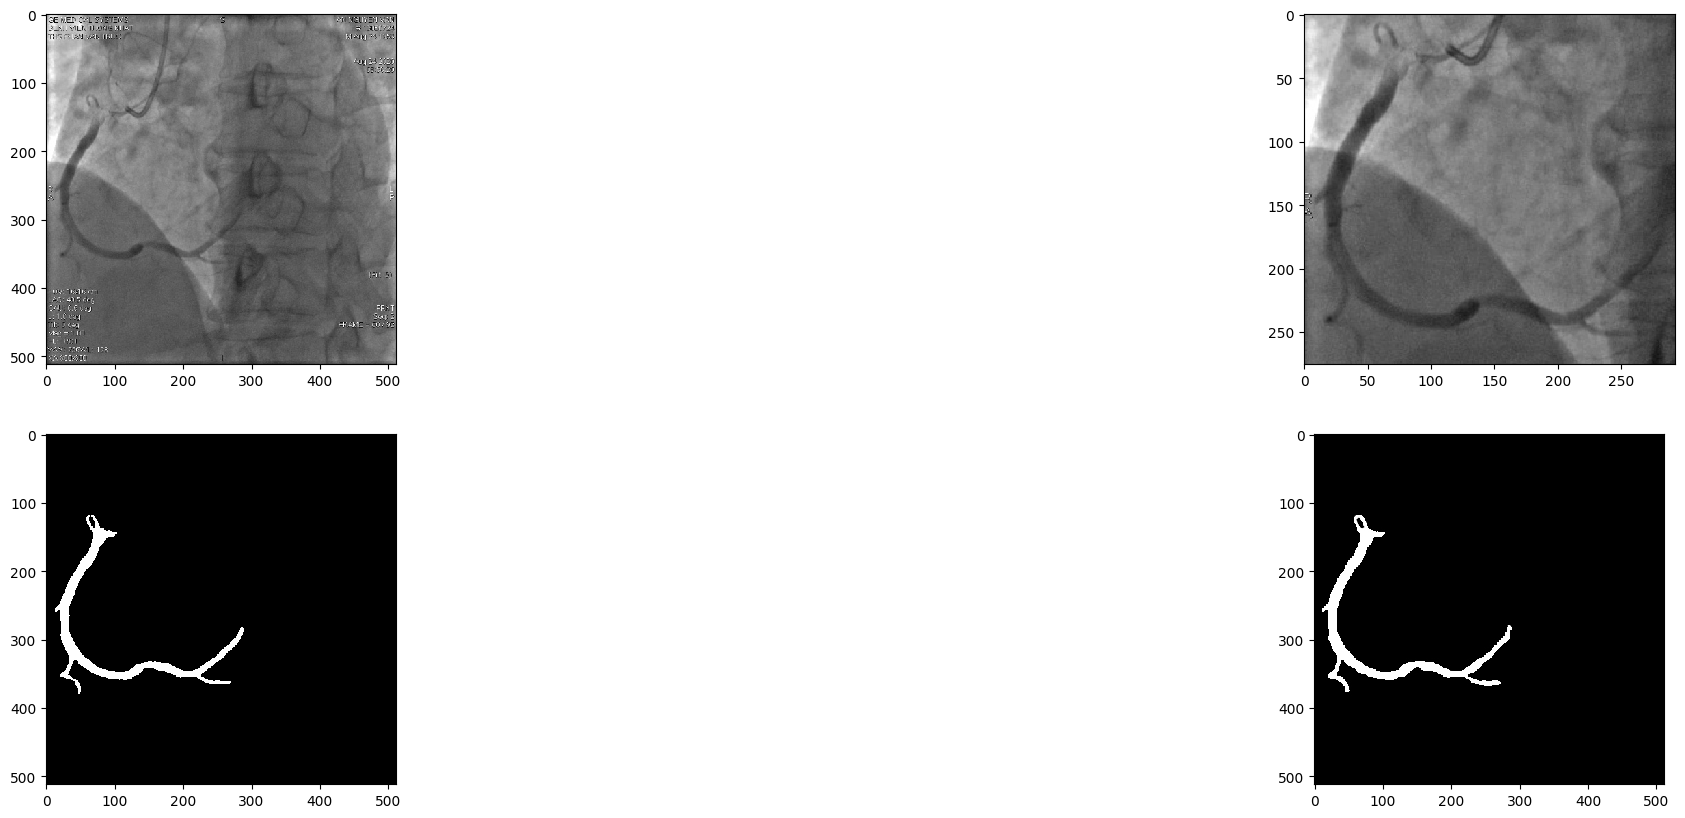

In [ ]:
path = os.path.join('data2/X/AN_NGUYEN_VANse000_118.jpg')
img = cv2.imread(path, 0)
path = os.path.join('data2/y/AN_NGUYEN_VANse000_118.jpg')
label = cv2.imread(path, 0)

# show_predictions(X[634]*255)
show_predictions(img, label)

In [ ]:
model.save("final2_model.h5")

## Evaluate the performance of the models

In [ ]:
# note: X is already normalized
def recall(model, X, y):

  pred = predict(X, model)
  pred[pred > 0.5] = 1
  pred[pred != 1] = 0

  multiply = pred*y
  s = np.sum(multiply)

  n = np.sum(y)

  return s/n

In [ ]:
# note: X is already normalized
def precision(model, X, y):

  pred = predict(X, model)
  pred[pred > 0.5] = 1
  pred[pred != 1] = 0

  multiply = pred*y
  s = np.sum(multiply)

  n = np.sum(pred)

  return s/n

In [ ]:
# note: X is already normalized
def f1_score(model, X, y):
  r = recall(model, X, y)
  p = precision(model, X, y)

  return 2*r*p/(r+p)

In [ ]:
# note: X is already normalized
def pixel_accuracy(model, X, y):

  pred = predict(X, model)
  pred[pred > 0.5] = 1
  pred[pred != 1] = 0

  o = np.absolute(pred-y)
  s = np.sum(o)

  n = X.shape[0]*512*512

  return 1-s/n

In [ ]:
X_test = np.load("X_test.npy")
y_test = np.load("y_test.npy")

In [ ]:
def fix_x(x):
  return np.rollaxis(x, 3, 1)

In [ ]:
X_test = fix_x(X_test)
y_test = fix_x(y_test)

In [ ]:
X_test.shape

(99, 1, 512, 512)

In [ ]:
print('recall: ', recall(model, X_test, y_test))
print('precision: ', precision(model, X_test, y_test))
print('f1_score: ', f1_score(model, X_test, y_test))
print('pixel_accuracy ', pixel_accuracy(model, X_test, y_test))

4/4 [==============================] - 39s 2s/step
recall:  0.80022264
4/4 [==============================] - 2s 755ms/step
precision:  0.894789
4/4 [==============================] - 2s 753ms/step
f1_score:  0.8448678337281563
4/4 [==============================] - 2s 753ms/step
pixel_accuracy  0.9918137373346271
